# E-COMMERCE CUSTOMER CHURN: Analysis and Prediciton

> by: Pro Machine Learning

> 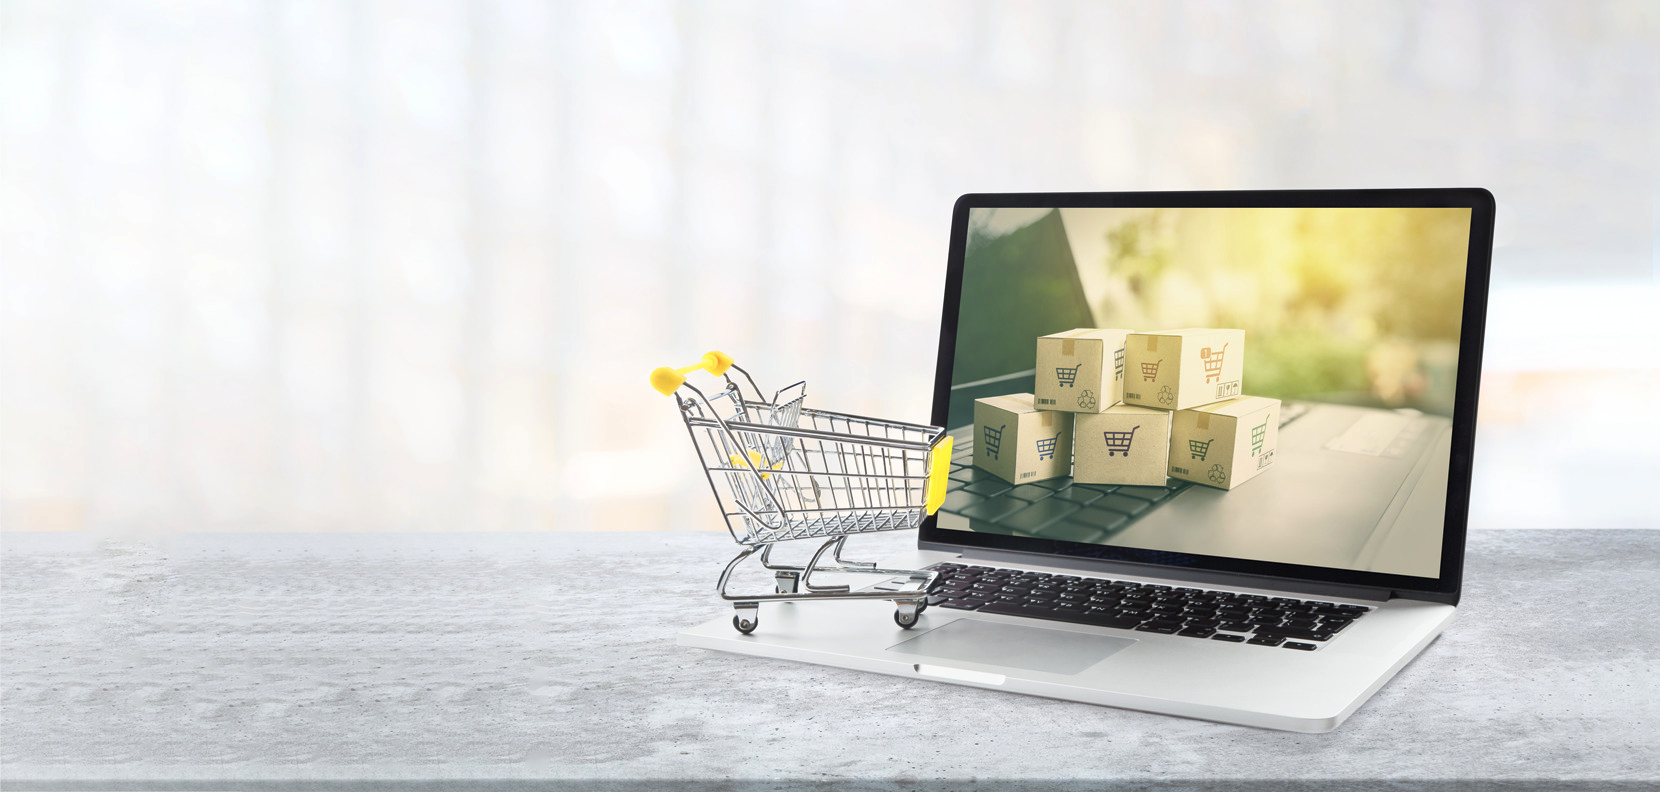

> Image Source: https://www.ssi-schaefer.com/id-id/solusi/by-intralogistic-strategy/ecommerce

# 1. BUSINESS UNDERSTANDING

> ## CONTEXT
>Perusahaan X yang beroperasi di sektor e-commerce memperoleh keuntungan melalui transaksi dengan pelanggannya, di mana semakin banyak jumlah pelanggan, semakin tinggi potensi terjadinya transaksi. Hal ini berdampak langsung pada peningkatan pendapatan perusahaan. Meskipun jumlah pelanggan terus bertambah dalam beberapa tahun terakhir, tingkat churn juga mengalami peningkatan yang signifikan, mengakibatkan stagnansi dalam pendapatan perusahaan. Data terakhir menunjukkan bahwa tingkat churn telah mencapai 16,84 %, mengindikasikan adanya kebutuhan mendesak untuk menjaga pelanggan setia di tengah kompetisi pasar yang semakin ketat. <br> <br>
> Menurut Harvard Business Review, biaya untuk mendapatkan pelanggan baru bisa 5 hingga 25 kali lebih mahal dibandingkan mempertahankan pelanggan yang sudah ada. Di samping itu, penelitian yang dilakukan oleh Bain & Company
menunjukan bahwa peningkatan retensi pelanggan sebesar 5% dapat meningkatkan keuntungan perusahaan hingga 25-95%. Dapat disimpulkan bahwa mempertahankan pelanggan yang sudah ada (mencegah churn) jauh lebih menguntungkan ketimbang mendapatkan kembali pelanggan baru.<br> <br>
> Oleh karena itu, perusahaan berencana untuk meluncurkan kampanye untuk mencegah churn dan mempertahankan pelanggan lama agar tingkat pendapatan perusahaan meningkat. Tim data analis diberi tugas untuk menganalisa data dan membuat strategi pencegahan yang tepat dan dapat diimplementasikan dalam meningkatkan retensi pelanggan dan pendapatan perusahaan.<br> <br>
> Referensi:
Gallo, A. (2014). The Value of Keeping the Right Customers. Harvard Business Review.
https://hbr.org/2014/10/the-value-of-keeping-the-right-customers

> ## STAKEHOLDER
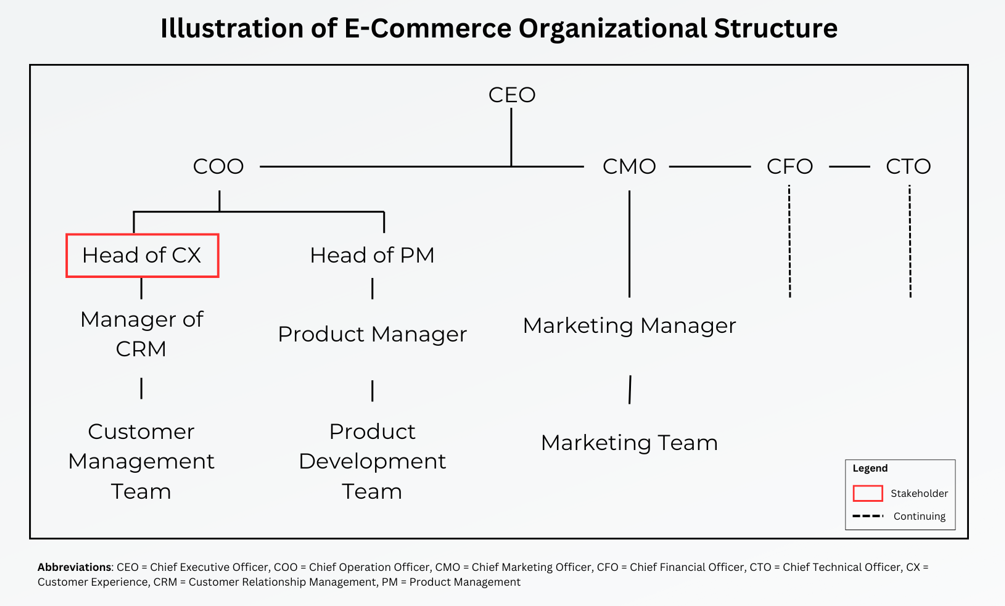
> Analisis ini ditujukan kepada `Head of Customer Experience`, selaku pemangku kepentingan dan pembuat keputusan dalam project ini. Beliau akan menggunakan hasil analisa untuk mengetahui pelanggan yang berpotensi churn dan rekomendasi strategi pencegahan yang Tim Data Analis sarankan sebagai pertimbangan untuk mengatasi situasi yang dialami.

> ## PROBLEM STATEMENT

> Dalam bisnis e-commerce, jumlah transaksi yang terjadi antara pelanggan dan penjual merupakan salah satu kunci untuk meningkatkan jumlah pendapatan perusahaan. Sementara itu, perusahaan menyadari bahwa `persentase pelanggan mereka yang churn jumlahnya semakin tinggi setiap tahunnya yang mengakibatkan pertumbuhan transaksi mereka menurun, membuat pertumbuhan pendapatan perusahaan cenderung stagnan`. Berdasarkan permasalahan tersebut, maka dapat dirumuskan beberapa pertanyaan bisnis sebagai berikut:

> `Pertanyaan bisnis utama:` <br>
> 1. `Bagaimana perusahaan dapat meningkatkan pendapatan dengan mempertahankan pelanggan yang sudah ada?`<br>

> `Pertanyaan riset berdasarkan data:` <br>
> 1. `Faktor apa saja yang berpengaruh terhadap potensi churn pelanggan?` <br>
>> 1.1. Bagaimana distribusi pelanggan secara keseluruhan? <br>
>> 1.2. Bagaimana distribusi pelanggan berdasarkan *churn rate*? <br>
> 2. `Strategi apa yang tepat untuk mengurangi tingkat churn?` <br>
>> 2.1. Bagimana model machine learning yang tepat untuk memprediksi pelanggan yang pberpotensi churn?<br>
>> 2.2. Bagaimana strategi promosi yang optimal untuk mencegah churn?

> ## GOALS
> Tujuan dari penelitian ini adalah untuk `mengidentifikasi faktor-faktor yang mempengaruhi churn pelanggan serta membangun model prediksi churn guna mengurangi tingkat churn di masa depan`. Dengan memahami faktor-faktor kunci yang memengaruhi churn, perusahaan dapat merancang strategi yang lebih efektif dalam mencegah churn. Selain itu, model prediksi churn memungkinkan perusahaan melakukan tindakan proaktif, seperti promosi atau program loyalitas, untuk mempertahankan pelanggan berpotensi churn, sehingga meningkatkan pendapatan perusahaan.

> ## ANALYTICAL APPROACH
>Analisa ini akan diawali dengan mengidentifikasi distribusi pelanggan e-commerce untuk mendapatkan gambaran awal dari karakteristik kemudian dilanjutkan dengan mengidentifikasi distribusi pelanggan yang telah dinyatakan churn, kemudian `dirancang sebuah model machine learning yang dapat memprediksi pelanggan yang berpotensi churn` berdasarkan pola churn yang telah terjadi sebelumnya. Setelah dilakukan analisa terhadap hasil prediksi, dirumuskan rekomendasi strategi yang tepat untuk mencegah pelanggan churn dan meningkatkan pendapatan perusahaan.

> ## METRIC EVALUATION
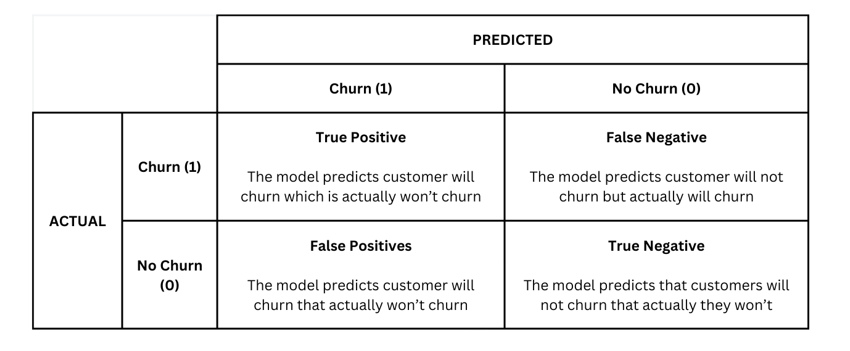

- Konsekuensi FN: Kehilangan pelanggaan yang membuat perusahaan mengeluarkan biaya yang besar untuk akuisisi pelanggan baru sebagai pengganti pelanggan yang telah churn
- Konsekuensi FP: Pemborosan biaya, waktu, dan sumber daya perusahaan dikarenakan campaign diberikan juga kepada pelanggan loyal yang tidak berpotensi churn <br> <br>

Metric utama yang akan digunakan dalam model yang dibuat adalah `F2 Score`yaitu metric yang digunakan dalam prediksi model machine learning dimana nilai ini merepresentasikan nilai precision dan recall yang hampir seimbang, dengan menitikberatkan kepada nilai recall.

$$ F2 = \frac{(1 + 2^2) \times \text{Precision} \times \text{Recall}}{(2^2 \times \text{Precision}) + \text{Recall}} $$

F2 Score digunakan untuk meminimalisir FN namun tetap memperhatikan konsekuensi dari FP, sehingga dapat dikatakan bahwa F2 Score berfokus pada nilai recall yang tinggi, namun tetap mempertimbangkan nilai precision, yang dalam konteks ini, kita ingin meminimalisir konskuensi yang lebih besar yaitu kehilangan pelanggan namun tetap mempertimbangkan alokasi budget campaign yang efektif.



# 2. PRELIMINARY DATA UNDERSTANDING

Sumber dataset: [E-Commerce Customer Churn](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

In [6]:
# # Install library
# !pip install category_encoders
# !pip install catboost

In [7]:
# Import Libraries

# Pengaturan waktu
import time

# Libraries untuk analisis data dan manipulasi
import pandas as pd
import numpy as np

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import missingno  # Visualisasi missing values

# Libraries untuk analisis statistik dan multikolinearitas
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries untuk pra-pemrosesan data
from sklearn.preprocessing import (
    OneHotEncoder, MinMaxScaler, RobustScaler, OrdinalEncoder, PolynomialFeatures
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline untuk menangani data imbalance
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce  # Encoding data kategorikal

# Libraries untuk pembagian data dan validasi
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve
)

# Libraries untuk model machine learning
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Libraries untuk evaluasi model
from sklearn.metrics import (
    fbeta_score, make_scorer, roc_auc_score, precision_recall_curve,
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# SHAP library untuk interpretasi model
import shap

# Mengabaikan warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Pengaturan Tampilan DataFrame
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 200)

In [8]:
# Import dataset raw
df_raw = pd.read_excel('E Commerce Dataset.xlsx', sheet_name="E Comm" )
df_raw.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
595        50596      1     NaN                Phone         1   
977        50978      0     9.0                Phone         3   
1221       51222      0    18.0         Mobile Phone         1   
417        50418      0    11.0         Mobile Phone         1   
3487       53488      1     1.0                Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
595              28.0           Debit Card  Female             2.0   
977               NaN           Debit Card    Male             3.0   
1221             31.0           Debit Card  Female             3.0   
417               6.0           Debit Card  Female             2.0   
3487             28.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
595                          3              Mobile                  3   
977                          3              Mobile                  1   
1221                         4  Laptop & Accessory                  1   
417                          3             Fashion                  3   
3487                         4        Mobile Phone                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
595       Divorced                5         1                         11.0   
977         Single                4         1                         21.0   
1221       Married                1         0                         13.0   
417         Single                5         1                         14.0   
3487       Married                3         0                         21.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
595          0.0         1.0                1.0          121.32  
977          0.0         1.0                2.0          126.44  
1221         0.0         3.0                8.0          159.06  
417          0.0         1.0                0.0          178.61  
3487         2.0         2.0                1.0          148.77

In [9]:
# Menampilkan jumlah baris dan kolom
df_raw.shape

(5630, 20)

In [10]:
# Melihat tipe data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
# Melihat persentase pelanggan churn
display(round(df_raw['Churn'].value_counts(normalize=True)*100,2))
churn_percentage =round(df_raw['Churn'].value_counts(normalize=True)[1]*100,2)
mom_churn_percentage =round(df_raw['Churn'].value_counts(normalize=True)[0]*100,2)
print(f'\nPersentase pelanggan churn adalah {churn_percentage}%')
print(f'Persentase pelanggan tidak churn adalah {mom_churn_percentage}%')

Churn
0    83.16
1    16.84
Name: proportion, dtype: float64


Persentase pelanggan churn adalah 16.84%
Persentase pelanggan tidak churn adalah 83.16%


`PENJELASAN`

Dataset yang digunakan dalam analisa ini adalah dataset berisi informasi pelanggan e-commerce meliputi `demografi dan interaksi pelanggan` dengan plaftform yang bersumber dari Kaggle: [E-Commerce Customer Churn](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction), unggahan Ankit Verma dengan update terakhir kurang lebih 4 tahun yang lalu. Dataset ini terdiri dari 4504 baris dan 20 kolom, dimana setiap barisnya merepresentasikan informasi seorang pelanggan dan setiap kolomnya memuat informasi dengan penjelasan sebagai berikut.

| `Variable`                   | `Tipe Data` | `Deskripsi`                                                   |
|--------------------------------|----------------|----------------------------------------------------------------|
| CustomerID                     | integer        | ID pelanggan unik                                             |
| Churn                          | integer        | Indikator churn                                               |
| Tenure                         | float          | Lama waktu keanggotaan pelanggan di e-commerse                            |
| PreferredLoginDevice           | object         | Perangkat login yang disukai oleh pelanggan                  |
| CityTier                       | integer        | Tingkat kota                                                 |
| WarehouseToHome                | float          | Jarak antara gudang dan rumah pelanggan                      |
| PreferredPaymentMode           | object         | Metode pembayaran yang disukai oleh pelanggan                |
| Gender                         | object         | Jenis kelamin pelanggan                                       |
| HourSpendOnApp                | float          | Jumlah jam yang dihabiskan di aplikasi mobile atau situs web |
| NumberOfDeviceRegistered       | integer        | Total jumlah perangkat yang terdaftar untuk pelanggan tertentu|
| PreferedOrderCat               | object         | Kategori pesanan yang disukai oleh pelanggan dalam sebulan terakhir|
| SatisfactionScore              | integer        | Skor kepuasan pelanggan terhadap layanan                     |
| MaritalStatus                  | object         | Status pernikahan pelanggan                                   |
| NumberOfAddress                | integer        | Total jumlah alamat yang ditambahkan oleh pelanggan          |
| Complain                       | integer        | Keluhan yang diajukan dalam sebulan terakhir                 |
| OrderAmountHikeFromlastYear   | float          | Persentase peningkatan jumlah pesanan dari tahun lalu       |
| CouponUsed                     | float          | Total jumlah kupon yang digunakan dalam sebulan terakhir      |
| OrderCount                     | float          | Total jumlah pesanan yang dilakukan dalam sebulan terakhir   |
| DaySinceLastOrder              | float          | Hari sejak pesanan terakhir oleh pelanggan                    |
| CashbackAmount                 | float          | Rata-rata cashback dalam sebulan terakhir                    |


`Variabel yang akan dijadikan target dari dataset ini yaitu Churn` yang diketahui komposisi kelas di dalamnya  `tidak seimbang`, kategori kelas positif (pelanggan churn) memiliki proporsi yang jauh lebih kecil (16.84%) dibandingkan dengan kelas negatif (pelanggan tidak churn (83.16%)).

# 3. EXPLORATORY DATA ANALYSIS

> ## 3.1. SPLIT DATA

In [15]:
# Membuat salinan dataset yang akan dianalisis
df = df_raw.copy()

In [16]:
# Memisahkan data train dan data test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2020)
df_train.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
3088       53089      0    11.0             Computer         1   
2734       52735      0     4.0             Computer         1   
3984       53985      0    15.0         Mobile Phone         1   
680        50681      0    18.0             Computer         3   
3362       53363      0    16.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
3088             32.0          Credit Card  Female             4.0   
2734              7.0           Debit Card    Male             2.0   
3984             12.0           Debit Card    Male             3.0   
680              15.0           Debit Card  Female             3.0   
3362             21.0          Credit Card  Female             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
3088                         4  Laptop & Accessory                  3   
2734                         5  Laptop & Accessory                  5   
3984                         2  Laptop & Accessory                  4   
680                          4  Laptop & Accessory                  3   
3362                         5  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
3088      Divorced                5         1                         16.0   
2734       Married                2         0                         21.0   
3984        Single                5         0                         13.0   
680       Divorced                2         0                         13.0   
3362        Single                9         0                         18.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
3088         4.0        11.0                8.0          169.49  
2734         6.0         8.0                7.0          150.03  
3984         2.0         2.0                3.0          193.70  
680          0.0         4.0               12.0          155.93  
3362         1.0         2.0                4.0          187.44

In [17]:
# Menampilkan jumlah baris dan kolom
df_train.shape

(4504, 20)

In [18]:
# Melihat nama-nama kolom beserta tipe data dan jumlah value Non-Null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4504 entries, 716 to 864
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4504 non-null   int64  
 1   Churn                        4504 non-null   int64  
 2   Tenure                       4302 non-null   float64
 3   PreferredLoginDevice         4504 non-null   object 
 4   CityTier                     4504 non-null   int64  
 5   WarehouseToHome              4317 non-null   float64
 6   PreferredPaymentMode         4504 non-null   object 
 7   Gender                       4504 non-null   object 
 8   HourSpendOnApp               4298 non-null   float64
 9   NumberOfDeviceRegistered     4504 non-null   int64  
 10  PreferedOrderCat             4504 non-null   object 
 11  SatisfactionScore            4504 non-null   int64  
 12  MaritalStatus                4504 non-null   object 
 13  NumberOfAddress       

In [19]:
# Membuat list_item dan mengisi data
list_item = []
for column in df_train.columns:
    list_item.append([column, df_train[column].nunique(), df_train[column].unique()])

# Membuat DataFrame table_unique
table_unique = pd.DataFrame(data=list_item, columns=['Nama Kolom', 'Jumlah Unique Value', 'Unique Value'])

# Menampilkan table_unique
table_unique

Nama Kolom  Jumlah Unique Value  \
0                    CustomerID                 4504   
1                         Churn                    2   
2                        Tenure                   36   
3          PreferredLoginDevice                    3   
4                      CityTier                    3   
5               WarehouseToHome                   34   
6          PreferredPaymentMode                    7   
7                        Gender                    2   
8                HourSpendOnApp                    6   
9      NumberOfDeviceRegistered                    6   
10             PreferedOrderCat                    6   
11            SatisfactionScore                    5   
12                MaritalStatus                    3   
13              NumberOfAddress                   15   
14                     Complain                    2   
15  OrderAmountHikeFromlastYear                   16   
16                   CouponUsed                   17   
17                   OrderCount                   16   
18            DaySinceLastOrder                   22   
19               CashbackAmount                 2467   

                                                                                                                                                                                               Unique Value  
0   [50717, 52780, 50204, 53288, 55466, 54775, 54019, 51205, 52923, 52332, 50955, 50633, 55022, 50173, 51157, 55594, 51111, 51734, 55123, 51395, 53612, 54669, 52828, 50557, 51839, 54315, 51412, 54618,...  
1                                                                                                                                                                                                    [0, 1]  
2   [0.0, 25.0, 6.0, 16.0, 28.0, 1.0, 2.0, 31.0, 12.0, 7.0, 20.0, 8.0, 19.0, 15.0, nan, 9.0, 11.0, 17.0, 21.0, 10.0, 27.0, 4.0, 14.0, 3.0, 5.0, 18.0, 30.0, 22.0, 13.0, 26.0, 24.0, 29.0, 23.0, 51.0, 50...  
3                                                                                                                                                                           [Phone, Computer, Mobile Phone]  
4                                                                                                                                                                                                 [1, 3, 2]  
5   [30.0, 35.0, 16.0, 7.0, 14.0, 12.0, 13.0, 27.0, 6.0, 9.0, 22.0, 33.0, 15.0, 8.0, nan, 17.0, 31.0, 25.0, 18.0, 23.0, 10.0, 28.0, 29.0, 11.0, 20.0, 19.0, 32.0, 26.0, 34.0, 24.0, 21.0, 36.0, 127.0, 5...  
6                                                                                                                                       [Credit Card, Debit Card, E wallet, CC, UPI, COD, Cash on Delivery]  
7                                                                                                                                                                                            [Male, Female]  
8                                                                                                                                                                       [2.0, 3.0, 4.0, nan, 1.0, 0.0, 5.0]  
9                                                                                                                                                                                        [3, 4, 5, 1, 6, 2]  
10                                                                                                                                     [Mobile Phone, Mobile, Laptop & Accessory, Fashion, Grocery, Others]  
11                                                                                                                                                                                          [4, 1, 2, 3, 5]  
12                                                                                                                                                                    

In [20]:
# Mengubah kolom CityTier, SatisfactionScore, dan Complain menjadi kategorik
df_train['CityTier']=df_train['CityTier'].astype('object')
df_train['SatisfactionScore'] = df_train['SatisfactionScore'].astype('object')
df_train['Complain'] = df_train['Complain'].astype('object')

In [21]:
# Menyatukan nama value/kelas yang memiliki arti sama
df_train['PreferredLoginDevice'] = df_train['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
df_train['PreferredPaymentMode'] = df_train['PreferredPaymentMode'].replace({'Credit Card':'CC', 'Cash on Delivery':'COD'})
df_train['PreferedOrderCat'] = df_train['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

`PENJELASAN`

`Terkait Format`

- Fitur pada dataset bervariasi, tersusun atas variabel `kuantitatif dan kualitatif`. Di mana sebagian besar merupakan variabel numerik-ratio dengan kardinalitas paling tinggi pada variabel CashbackAmount.
- Terdapat kolom dengan `tipe data yang secara kontekstual tidak sesuai, yaitu CityTier, SatisfactionScore, dan Complain`. Maka dari itu dilakukan penangan dengan merubah tipe data menjadi object.
- Terdapat beberapa variabel kategorik yang mengandung unique value dengan arti yang `redundant/berulang`. Telah ditangani dengan penjelasan sebagai berikut:
>- Kolom `PreferredLoginDevice`: mengubah value "Phone" menjadi "Mobile Phone".
>- Kolom `PreferredPaymentMode`: mengubah value "Credit Card" menjadi "CC" dan "Cash On Delivery" menjadi "COD".
>- Kolom `PreferedOrderCat`: mengubah unique value "Mobile" menjadi "Mobile PHone".

`Lainnya`

- Dataset memiliki `missing value` dilihat dari jumlah data Non-Null yang berbeda di beberapa variabel
- Dataset tidak memiliki `duplikat`, dilihat dari jumlah unique value dari customer_id yang sama dengan jumlah keseluruhan data yaitu 4504.

> ## 3.2. EXPLORE DATA

>> ### 3.2.2 MISSING VALUE CHECK

In [25]:
# Menampilkan jumlah data missing pada setiap kolom
missing_data = pd.DataFrame(data = df_train.isna().sum(), columns = ['Missing Values'])
missing_data['Percentage'] = round((df_train.isna().sum()/len(df_train))*100,2)

# Create a DataFrame to display the total rows with missing values and the percentage
missing_df = pd.DataFrame({
    'Total Rows with Missing Values': df_train.isna().any(axis=1).sum(),
    'Percentage of Missing Values': round((df_train.isna().any(axis=1).sum() / len(df_train)) * 100, 2)
}, index=['Missing Value Summary'])

display(missing_data,missing_df)

Missing Values  Percentage
CustomerID                                0        0.00
Churn                                     0        0.00
Tenure                                  202        4.48
PreferredLoginDevice                      0        0.00
CityTier                                  0        0.00
WarehouseToHome                         187        4.15
PreferredPaymentMode                      0        0.00
Gender                                    0        0.00
HourSpendOnApp                          206        4.57
NumberOfDeviceRegistered                  0        0.00
PreferedOrderCat                          0        0.00
SatisfactionScore                         0        0.00
MaritalStatus                             0        0.00
NumberOfAddress                           0        0.00
Complain                                  0        0.00
OrderAmountHikeFromlastYear             217        4.82
CouponUsed                              207        4.60
OrderCount                              214        4.75
DaySinceLastOrder                       248        5.51
CashbackAmount                            0        0.00

Total Rows with Missing Values  \
Missing Value Summary                            1481   

                       Percentage of Missing Values  
Missing Value Summary                         32.88

`PENJELASAN`

Diketahui bahwa terdapat 7 kolom yang mengandung missing value, yaitu `Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder`, dengan jumlah data dengan missing value `sebanyak 1481 data, sekitar 33%` dari keseluruhan data.

<Axes: >

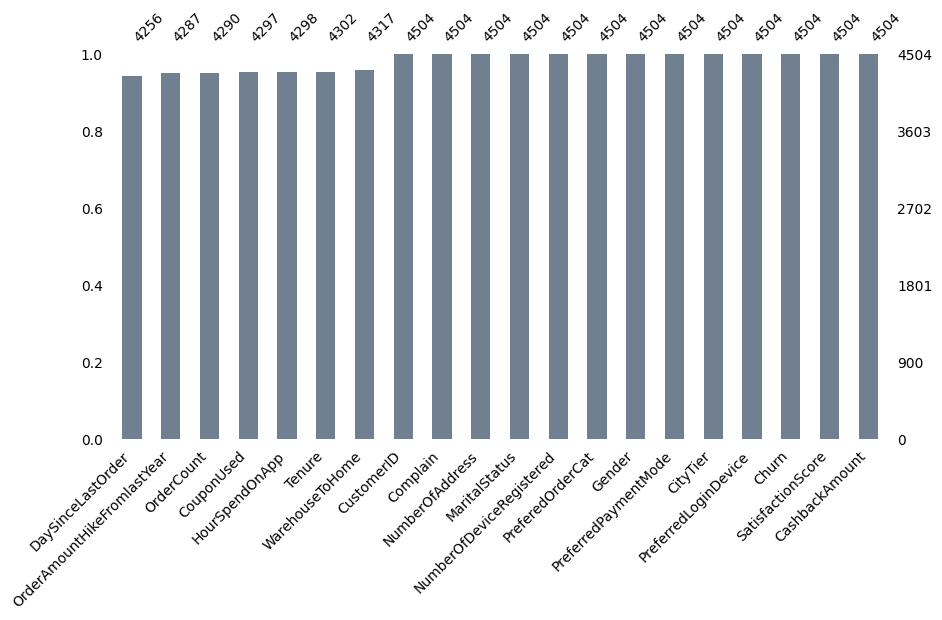

In [27]:
# Melihat visualisasi barplot missing value menggunakan library missingno
missingno.bar(df=df_train,
              figsize=(10,5),
              fontsize=10,
              sort="ascending",
              color='slategrey')

`PENJELASAN`

Dilihat dari Bar Plot di atas, terdapat 7 kolom yang memiliki missing value, yaitu DaySinceLastOrder, OrderAmountHikeFromlasYear, OrderCount, CoupunUsed, HourSpendOnApp, Tenure, dan WarehouseToHome. `Jumlah missing value pada 7 kolom tersebut hampir sama`, maka dari itu perlu dilakukan analisa apakah missing value dari masing-masing kolom saling berhubungan.

<Axes: >

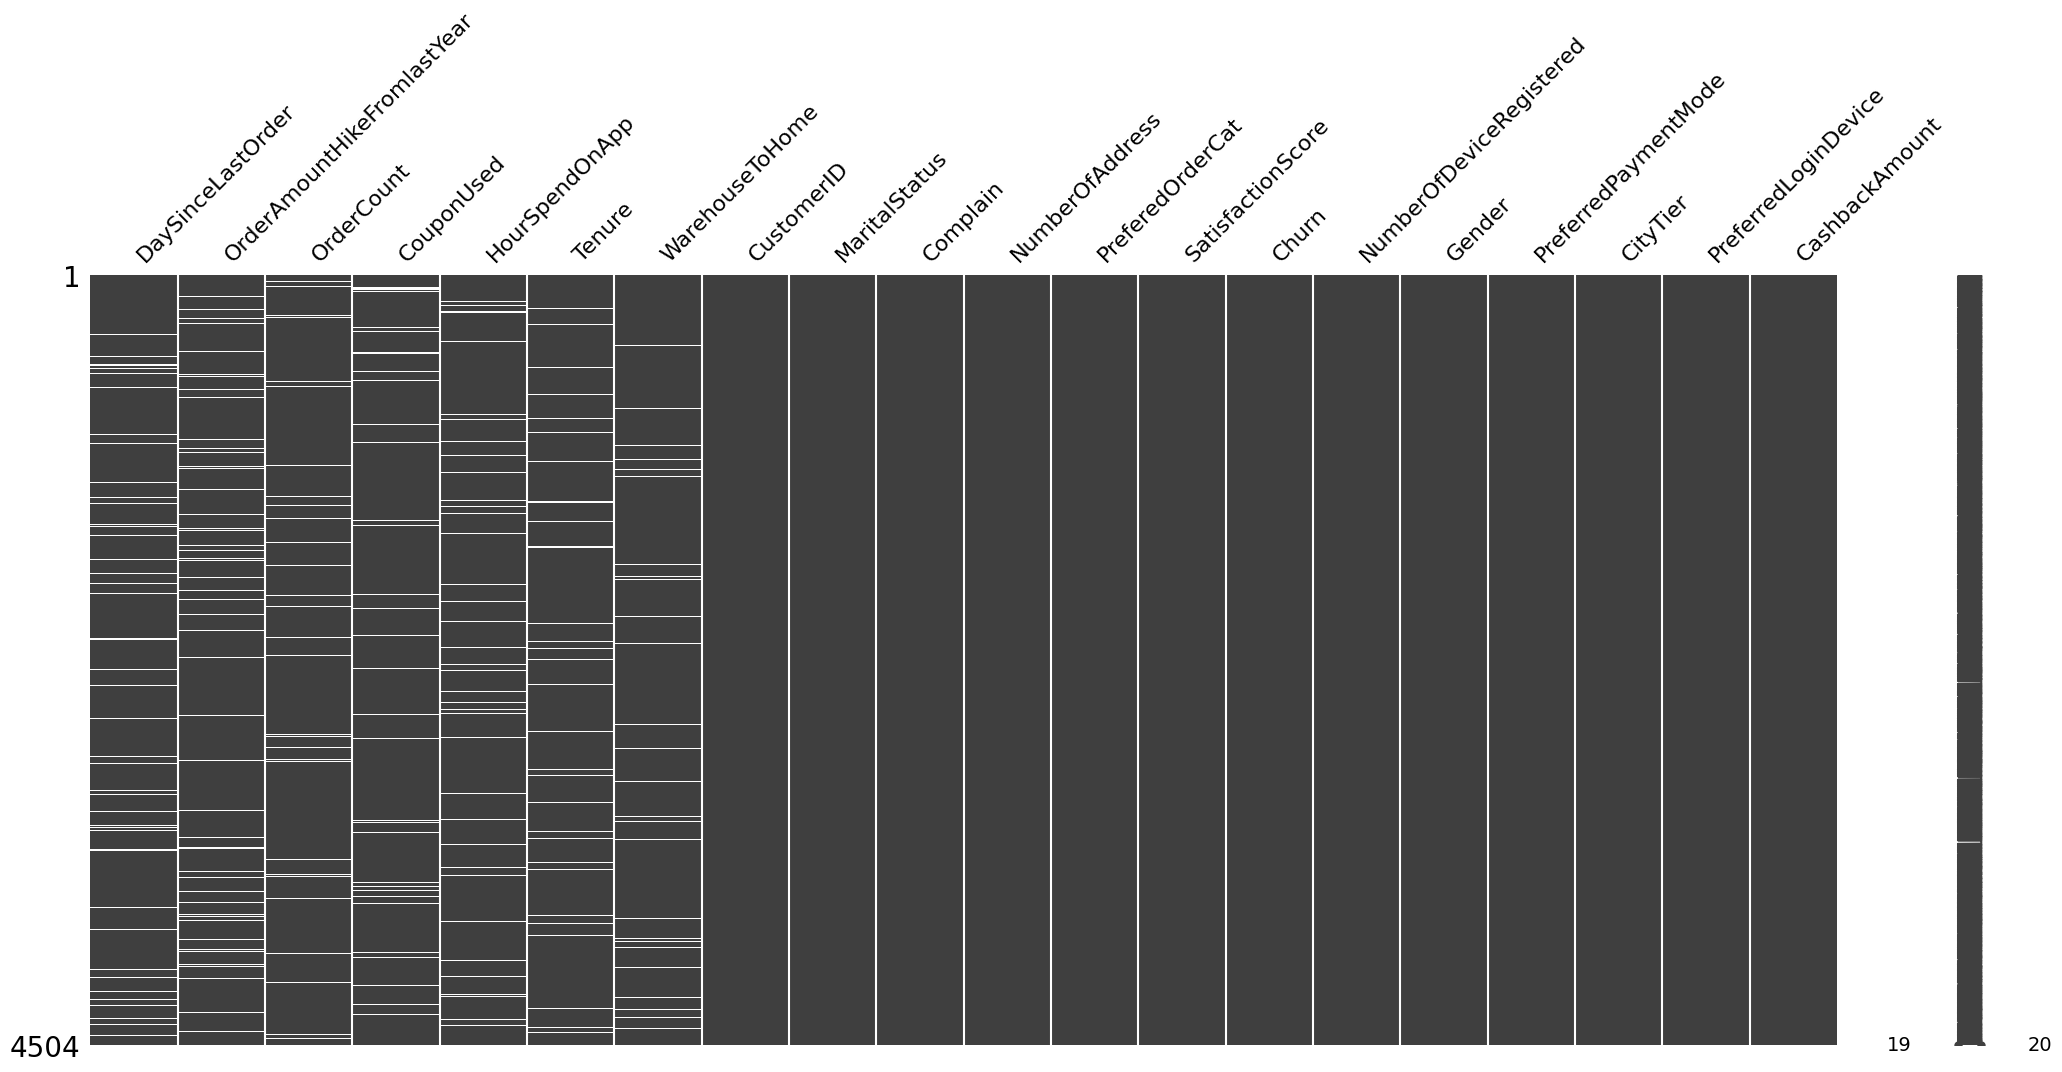

In [29]:
# Melihat visualisasi matrix plot missing value menggunakan library missingno
missingno.matrix(df_train[df_train.isna().sum().sort_values(ascending=False).index])

`PENJELASAN`

Dilihat dari Matrix Plot di atas, kita dapat mengetahui distribusi missing values pada dataset, dimana `tidak terdapat adanya garis lurus atau pola yang serupa` antara antara masing-masing 7 kolom yang memiliki missing values, menunjukan bahwa tidak adanya korelasi antara missing values.

Kesimpulannya, tidak ada makna khusus dibalik missing value yang ada. Dikarenakan jumlahnya yang cukup banyak, maka missing value tidak dapat dihapus begitu saja, sehingga dilakukan `penanganan lebih lanjut pada tahapan data cleaning`.

>> ### 3.2.3. DUPLICATE CHECK

> Sebelum melakukan pengecekan terhadap data duplikat, dilakukan `drop kolom CustomerID` terlebih dahulu, dikarenakan kolom ini tidak mengandung informasi yang penting dalam proses analisa dan pembuatan model, serta dapat menutupi adanya data duplikat dalam dataset, karena bisa saja terdapat beberapa pelanggan berbeda namun dengan perilaku yang sama.

In [33]:
# Melakukan drop pada kolom CustomerID
df_train.drop(columns=['CustomerID'], inplace=True)

In [34]:
# Memeriksa apakah ada data yang memiliki value identik di seluruh kolom yang tersedia
df_train[df_train.duplicated(subset=df_train.columns)]
df_train.duplicated().value_counts()

False    4164
True      340
Name: count, dtype: int64

In [35]:
# Melihat data yang dianggap sebagai duplikat
duplicate_data = pd.concat([df_train,pd.DataFrame(df_train.duplicated(subset=df_train.columns))], axis=1)
duplicate_data[duplicate_data[0] == True]

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
1059      0    27.0         Mobile Phone        1             28.0   
3143      1     1.0             Computer        2             24.0   
5359      0    10.0         Mobile Phone        1             33.0   
3944      0    23.0         Mobile Phone        3             18.0   
368       0    17.0         Mobile Phone        2              6.0   
2463      0     NaN         Mobile Phone        1              9.0   
4098      0     1.0         Mobile Phone        1             19.0   
3396      1     4.0             Computer        3             31.0   
5491      0    22.0         Mobile Phone        1             17.0   
5100      1     3.0         Mobile Phone        1             30.0   
5388      0    15.0             Computer        2             11.0   
2805      0     2.0         Mobile Phone        1             34.0   
1090      0     8.0             Computer        1              8.0   
3916      0     6.0             Computer        1             17.0   
1320      0    14.0         Mobile Phone        1             34.0   
2388      0    26.0         Mobile Phone        1              8.0   
2547      0    11.0         Mobile Phone        1             10.0   
1270      1     0.0             Computer        3             32.0   
5447      0    16.0         Mobile Phone        1             20.0   
3138      0    14.0         Mobile Phone        1             13.0   
4037      0    10.0             Computer        2              9.0   
3077      0    14.0         Mobile Phone        3              9.0   
5357      0     1.0         Mobile Phone        3             16.0   
3379      1     1.0         Mobile Phone        1             11.0   
3571      0     6.0             Computer        1              9.0   
5087      0    10.0         Mobile Phone        1              9.0   
3449      0    19.0         Mobile Phone        2             31.0   
3744      0    23.0         Mobile Phone        1             14.0   
5174      0     5.0         Mobile Phone        1             15.0   
2887      0    16.0             Computer        1             28.0   
1511      0    14.0         Mobile Phone        1              NaN   
435       0     7.0         Mobile Phone        1             14.0   
4739      0     8.0         Mobile Phone        1              9.0   
3750      1     1.0             Computer        1             16.0   
2391      0    17.0         Mobile Phone        1             26.0   
1167      0    12.0             Computer        3             26.0   
4459      0    25.0         Mobile Phone        1              9.0   
3147      1     1.0             Computer        3             12.0   
1321      0     7.0         Mobile Phone        3             34.0   
2180      0     8.0         Mobile Phone        2             14.0   
2810      0     9.0             Computer        1              NaN   
3808      0     1.0         Mobile Phone        1             10.0   
4642      1     1.0         Mobile Phone        3             20.0   
935       1     0.0             Computer        1             15.0   
697       0     7.0             Computer        1              8.0   
5535      1     1.0             Computer        1             12.0   
4089      0    17.0         Mobile Phone        1             18.0   
2864      0    19.0         Mobile Phone        3             11.0   
3860      0     1.0             Computer        1              9.0   
4383      0    12.0         Mobile Phone        3             10.0   
1217      0     7.0         Mobile Phone        3             10.0   
3753      0     3.0         Mobile Phone        3             26.0   
4158      0    23.0             Computer        3              9.0   
4029      1     1.0         Mobile Phone        1             14.0   
756       0     5.0             Computer        1              8.0   
4313      0    19.0         Mobile Phone        1             16.0   
1319      1    1

`PENJELASAN`

Ditemukan sebanyak 4164 data unique dan `340 data duplikat, yaitu sekitar 8% dari keseluruhan data`. Data duplikat ini kemudian akan di drop pada tahapan data cleaning, karena jika tidak, akan menimbulkan bias, yang dalam kasus ini memberikan bobot yang lebih besar pada data yang duplikat ketika model mempelajari data.

>> ### 3.2.4. OUTLIERS CHECK

In [38]:
# Membuat variabel berisi kolom numerik yang akan dilakukan uji normalitas
column_numeric = df_train[['Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

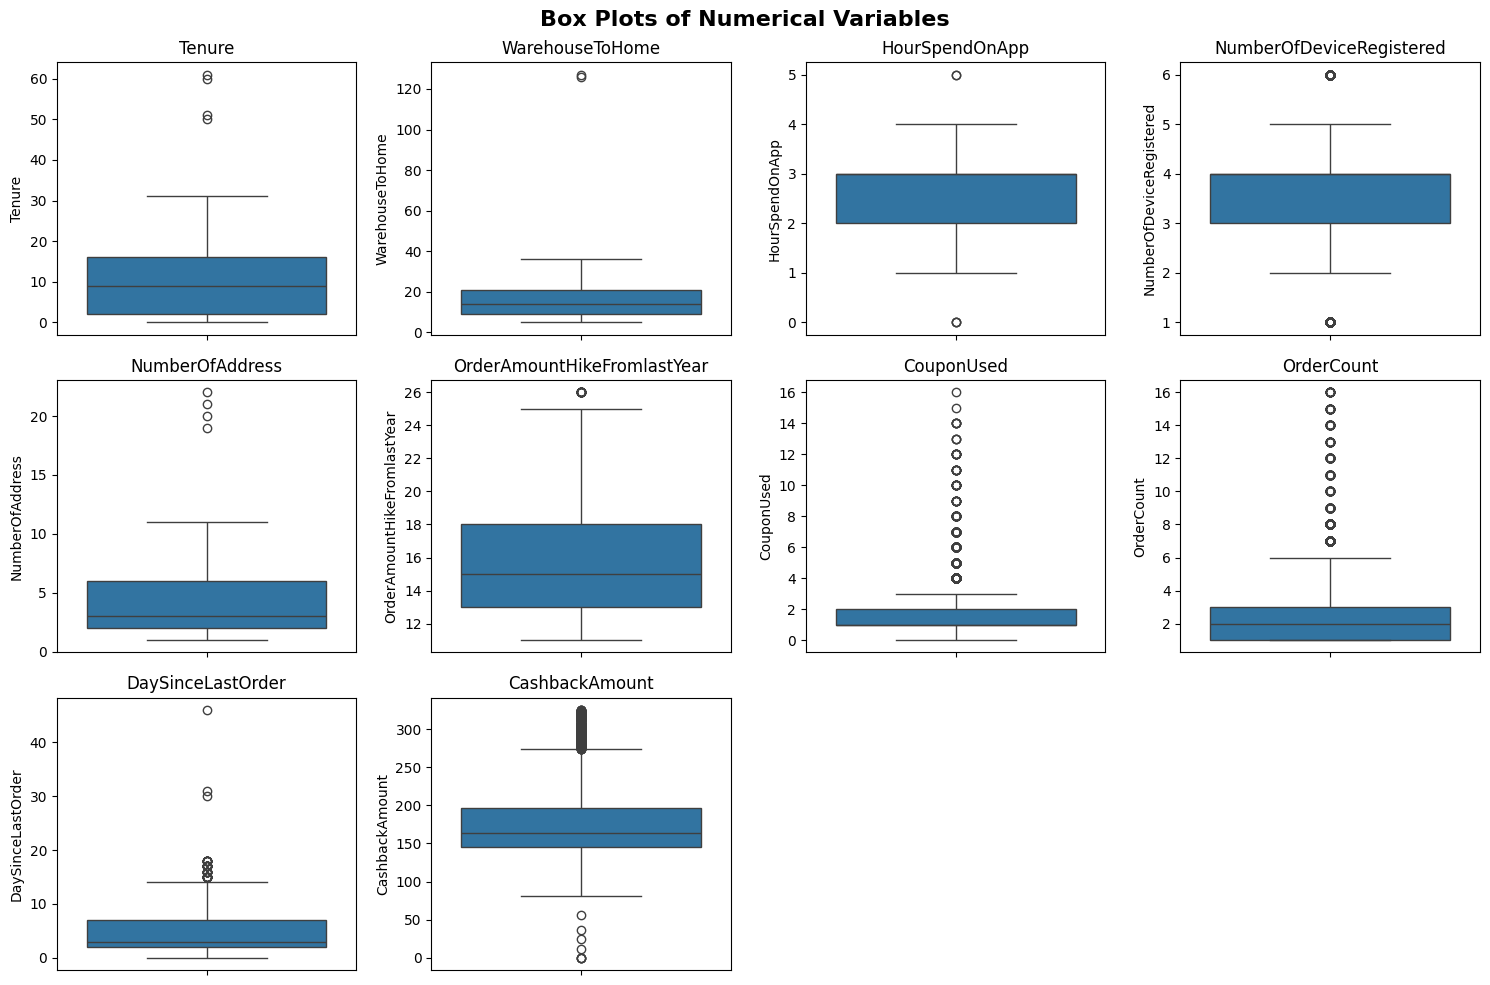

In [39]:
# Membuat subplot untuk boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom numerik
for i, column in enumerate(column_numeric.columns):
  sns.boxplot(y=df_train[column], ax=axes[i])
  axes[i].set_title(column)

# Menghapus subplot yang tidak digunakan
for i in range(len(column_numeric.columns), len(axes)):
  fig.delaxes(axes[i])

# Menyesuaikan tata letak subplot
plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

In [40]:
# Menghitung IQR, upper bound, and lower kolom numerik
for column in df_train.select_dtypes(include=np.number):
  if column not in ['Churn', 'CityTier', 'SatisfactionScore']:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    print(f"Column: {column}")
    print(f"IQR: {IQR}")
    print(f"Upper bound: {upper_bound}")
    print(f"Lower bound: {lower_bound}")
    print("-" * 20)

Column: Tenure
IQR: 14.0
Upper bound: 37.0
Lower bound: -19.0
--------------------
Column: WarehouseToHome
IQR: 12.0
Upper bound: 39.0
Lower bound: -9.0
--------------------
Column: HourSpendOnApp
IQR: 1.0
Upper bound: 4.5
Lower bound: 0.5
--------------------
Column: NumberOfDeviceRegistered
IQR: 1.0
Upper bound: 5.5
Lower bound: 1.5
--------------------
Column: NumberOfAddress
IQR: 4.0
Upper bound: 12.0
Lower bound: -4.0
--------------------
Column: OrderAmountHikeFromlastYear
IQR: 5.0
Upper bound: 25.5
Lower bound: 5.5
--------------------
Column: CouponUsed
IQR: 1.0
Upper bound: 3.5
Lower bound: -0.5
--------------------
Column: OrderCount
IQR: 2.0
Upper bound: 6.0
Lower bound: -2.0
--------------------
Column: DaySinceLastOrder
IQR: 5.0
Upper bound: 14.5
Lower bound: -5.5
--------------------
Column: CashbackAmount
IQR: 51.06
Upper bound: 273.64
Lower bound: 69.4
--------------------


In [41]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[col] < lower_bound) | (df[col] > upper_bound)

# Menggabungkan deteksi outlier untuk semua kolom numerik
outliers = pd.DataFrame({col: detect_outliers_iqr(df_train, col) for col in column_numeric})

# Menentukan baris yang memiliki outlier di setidaknya satu kolom
outlier_rows = outliers.any(axis=1)

# Menghitung jumlah dan persentase outlier
total_outliers = outlier_rows.sum()
total_data = len(df_train)
percent_outliers = (total_outliers / total_data) * 100

print(f"Jumlah outlier: {total_outliers}")
print(f"Persentase outlier terhadap seluruh data: {percent_outliers:.2f}%")

Jumlah outlier: 1289
Persentase outlier terhadap seluruh data: 28.62%


In [42]:
# Menghitung jumlah outlier

# Fungsi untuk menghitung persentase outlier
def calculate_outlier_percentage(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_percentage = round(outliers.mean() * 100,2)  # Menghitung persentase outlier
    return outlier_percentage

# Menghitung persentase outlier untuk setiap kolom dan menyimpannya dalam dictionary
outlier_percentages = {col: calculate_outlier_percentage(df_train[col]) for col in column_numeric.columns}

# Mengubah dictionary menjadi DataFrame untuk tampilan yang lebih baik
outlier_df = pd.DataFrame(outlier_percentages.items(), columns=['Column', 'Outlier Percentage'])

# Menampilkan hasil
display (outlier_df)

Column  Outlier Percentage
0                       Tenure                0.09
1              WarehouseToHome                0.04
2               HourSpendOnApp                0.11
3     NumberOfDeviceRegistered                7.15
4              NumberOfAddress                0.09
5  OrderAmountHikeFromlastYear                0.58
6                   CouponUsed               11.41
7                   OrderCount               12.61
8            DaySinceLastOrder                1.15
9               CashbackAmount                7.77

`PENJELASAN`

Diketahui bahwa terdapat `1289 data yang tergolong outlier, yang mana merupakan 29%` dari total keseluruhan data. Akan dilakukan beberapa percobaan dalam mengangani data duplikat ini untuk mendapatkan solusi penganan terbaik yang dapat menghasilkan dengan akurasi tinggi.

> ## 3.3. ANALYSE DATA

>> ### 3.3.1. CUSTOMER DISTRIBUTION

`CHURN DISTRIBUTION`

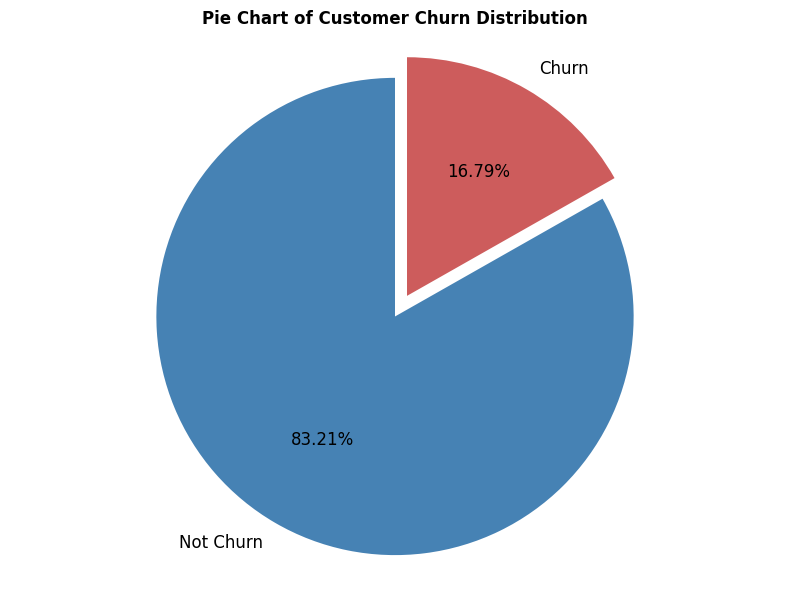

In [47]:
# Menghitung pelanggan churn dan tidak churn
churn_counts = df_train['Churn'].value_counts()

# Membuat pie chart dengan explode pada bagian Churn
plt.figure(figsize=(8, 6))
plt.pie(churn_counts.values, labels=['Not Churn', 'Churn'], autopct='%1.2f%%', startangle=90,
        colors=['SteelBlue', 'IndianRed'], textprops={'fontsize': 12},
        explode=[0, 0.1])  # 0 untuk Not Churn, 0.1 untuk Churn

# Menambahkan judul
plt.title("Pie Chart of Customer Churn Distribution", fontweight='bold')

# Menampilkan pie chart
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.tight_layout()
plt.show()

`PENJELASAN`

Dataset memiliki variabel target (Churn) yang `tidak seimbang` (*imbalance*), yaitu sebesar 83,21% kelas negatif (tidak churn), dan 16,79% kelas positif (churn). Perlu dilakukan penanganan agar model tidak dominan mempelajari pada kelas negatif, namun juga pada kelas positif.

In [49]:
# Melihat nilai statistik deskriptif masing-masing kolom
display(df_train.describe().drop(columns=['Churn']),
        df_train[['PreferredLoginDevice',	'PreferredPaymentMode',	'Gender',	'PreferedOrderCat',	'MaritalStatus', 'CityTier', 'SatisfactionScore', 'Complain']].describe())

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  4302.000000      4317.000000     4298.000000               4504.000000   
mean     10.255463        15.691221        2.930665                  3.681172   
std       8.662928         8.593694        0.723510                  1.025996   
min       0.000000         5.000000        0.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      16.000000        21.000000        3.000000                  4.000000   
max      61.000000       127.000000        5.000000                  6.000000   

       NumberOfAddress  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count      4504.000000                  4287.000000  4297.000000  4290.000000   
mean          4.235346                    15.697691     1.758902     3.023077   
std           2.594111                     3.676177     1.877425     2.940568   
min           1.000000                    11.000000     0.000000     1.000000   
25%           2.000000                    13.000000     1.000000     1.000000   
50%           3.000000                    15.000000     1.000000     2.000000   
75%           6.000000                    18.000000     2.000000     3.000000   
max          22.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        4256.000000     4504.000000  
mean            4.549577      177.683282  
std             3.672540       49.356761  
min             0.000000        0.000000  
25%             2.000000      145.990000  
50%             3.000000      163.580000  
75%             7.000000      197.050000  
max            46.000000      324.990000

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  4504                 4504   4504                4504   
unique                    2                    5      2                   5   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   3190                 1840   2697                1654   

       MaritalStatus  CityTier  SatisfactionScore  Complain  
count           4504      4504               4504      4504  
unique             3         3                  5         2  
top          Married         1                  3         0  
freq            2386      2944               1379      3213

`PENJELASAN`

- Dataset secara umum `tidak terdistribusi normal dilihat dari statistik deskriptifnya yang menunjukan selisih nilai mean dan Q2 (median) yang cukup signifikan.` Namun perlu dilakukan analisa lebih lanjut untuk memastikan distribusi yang tepat.
- Dataset `tidak mengandung negative value`, terlihat dari nilai minimum pada kolom numerik semua berupa bilangan bulat positif.

`CUSTOMER DISTRIBUTION BASED ON NUMERICAL FEATURES`

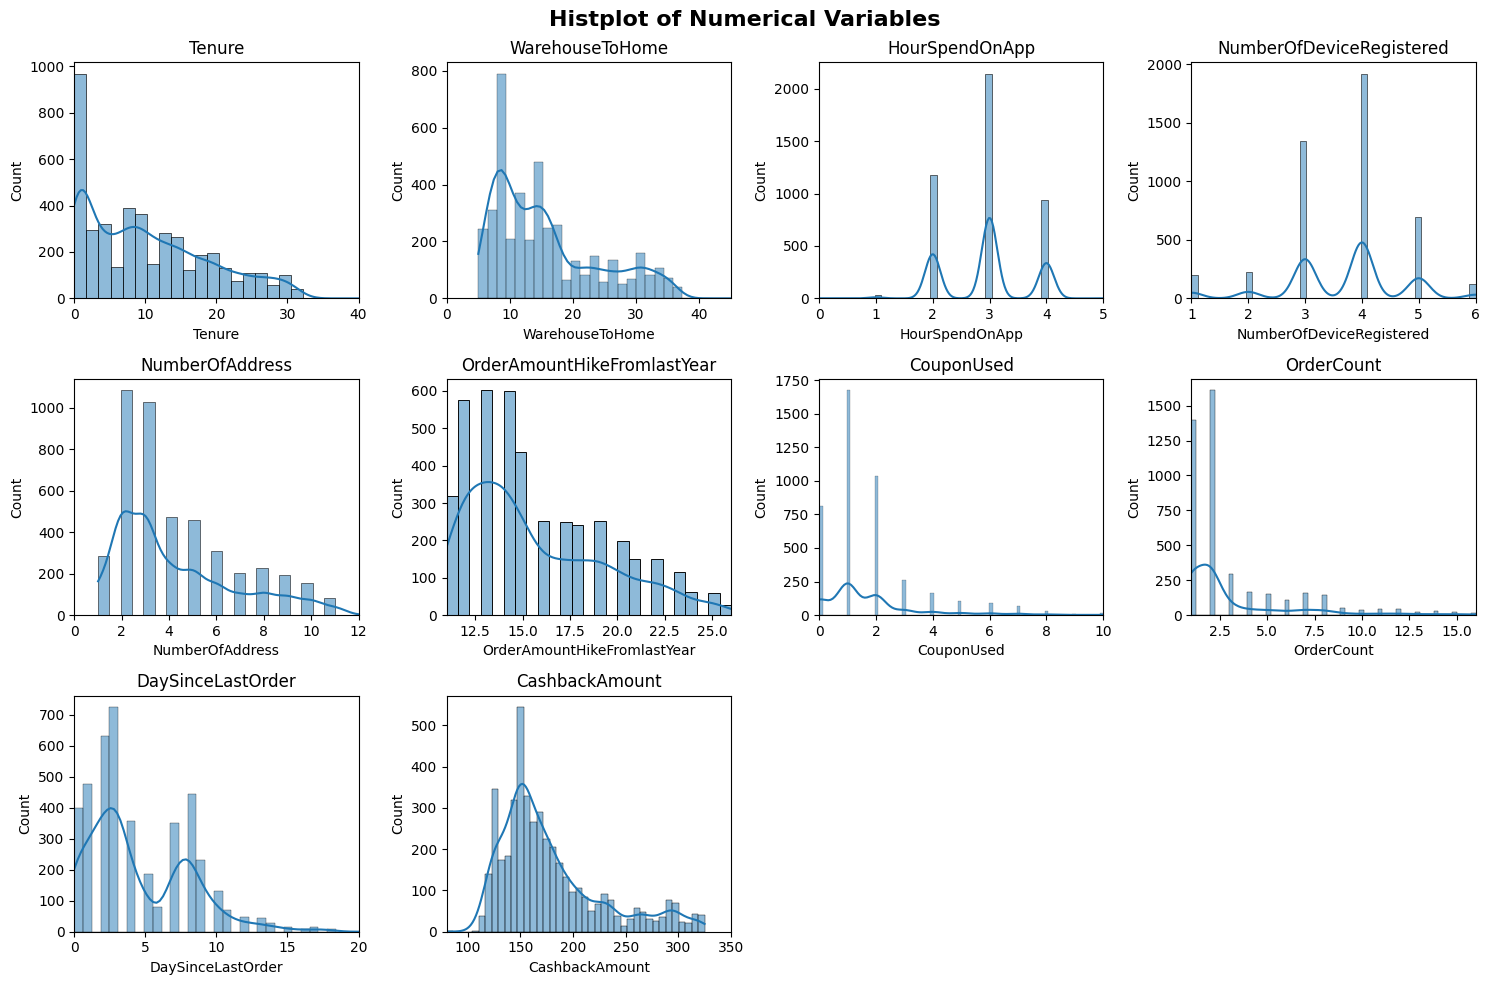

In [52]:
# Membuat histogram untuk kolom numerik

# Mengatur batas sumbu x
x_limits = {
    'Tenure': (0, 40),
    'WarehouseToHome': (0, 45),
    'NumberOfAddress': (0, 12),
    'CouponUsed': (0, 10),
    'DaySinceLastOrder': (0, 20),
    'CashbackAmount': (80, 350)
}

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom numerik
for i, column in enumerate(column_numeric.columns):
    sns.histplot(df_train[column], kde=True, ax=axes[i]
                #  , color='blue'
                 )
    axes[i].set_title(column)

    # Mengatur batas sumbu x sesuai dengan yang ditentukan di x_limits
    if column in x_limits:
        axes[i].set_xlim(x_limits[column])
    else:
        axes[i].set_xlim(df_train[column].min(), df_train[column].max())  # Jika tidak ada batas, gunakan min-max

# Menghapus subplot yang tidak digunakan
for i in range(len(column_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

# Menyesuaikan tata letak subplot
plt.suptitle('Histplot of Numerical Variables', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()


In [53]:
# Loop untuk mendapatkan nilai dengan jumlah pelanggan tertinggi di tiap kolom
highest_count_values = {}

for col in column_numeric.columns:
    mode_value = df_train[col].mode()[0]  # Nilai dengan jumlah tertinggi
    count_value = df_train[col].value_counts().max()  # Jumlah kemunculan tertinggi
    highest_count_values[col] = {'most_frequent_value': mode_value, 'count': count_value}

# Menampilkan hasil
highest_count_df = pd.DataFrame(highest_count_values).T
highest_count_df

most_frequent_value   count
Tenure                                      1.00   555.0
WarehouseToHome                             9.00   443.0
HourSpendOnApp                              3.00  2145.0
NumberOfDeviceRegistered                    4.00  1921.0
NumberOfAddress                             2.00  1085.0
OrderAmountHikeFromlastYear                13.00   602.0
CouponUsed                                  1.00  1675.0
OrderCount                                  2.00  1610.0
DaySinceLastOrder                           3.00   726.0
CashbackAmount                            149.36     7.0

In [54]:
# Melakukan uji normalitas dengan menggunakan metode Shapiro Wilk
from scipy.stats import shapiro

for column in  column_numeric:
    stat,p = shapiro(df_train[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"Kolom '{column}' terdistribusi normal (p-value: {p:.4f})")
    else:
        print(f"Kolom '{column}' tidak terdistribusi normal (p-value: {p:.4f})")

Kolom 'Tenure' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'WarehouseToHome' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'HourSpendOnApp' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumberOfDeviceRegistered' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumberOfAddress' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'OrderAmountHikeFromlastYear' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'CouponUsed' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'OrderCount' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'DaySinceLastOrder' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'CashbackAmount' tidak terdistribusi normal (p-value: 0.0000)


`PENJELASAN`

Dilakukan visualiasi data numerik menggunakan histogram dan uji normalitas Shapiro-Wilk (metode terbaik saat ini), untuk melihat distribusi data. Didapat bahwa seluruh kolom numerik pada dataset `tidak terdistribusi normal` dengan mayoritas distribui `right skewed` dengan detail sebagai berikut:
- `Kolom Tenure`: Mayoritas pelanggan baru menggunakan platform selama `1 bulan`, menunjukkan bahwa sebagian besar pengguna adalah pendatang baru di platform.

- `Kolom WarehouseToHome`: Sebagian besar pelanggan memiliki jarak `9 km` antara gudang pengiriman e-commerce dengan rumah mereka.

- `Kolom HourSpendOnApp`: Sebagian besar pelanggan menghabiskan `3 jam` di aplikasi.

- `Kolom NumberOfDeviceRegistered`: Mayoritas pelanggan mendaftarkan `4 perangkat` ke akun mereka, menunjukkan kecenderungan pengguna untuk mengakses platform dari beberapa perangkat.

- `Kolom NumberOfAddress`: Sebagian besar pelanggan memiliki `2 alamat` yang terdaftar, menunjukkan kebutuhan mereka akan fleksibilitas dalam lokasi pengiriman.

- `Kolom OrderAmountHikeFromlastYear`: Sebagian besar pelanggan memiliki peningkatan jumlah pesanan sebesar `13 %` dibandingkan tahun lalu, menunjukkan adanya kenaikan aktivitas belanja pelanggan dibanding tahun sebelumnya.

- `Kolom CouponUsed`: Sebagian besar pelanggan telah menggunakan `1 kupon`, menunjukkan minat yang besar terhadap penggunaan diskon atau penawaran khusus.

- `Kolom OrderCount`: Sebagian besar pelanggan melakukan `2 pesanan`, menunjukkan frekuensi belanja pengguna.

- `Kolom DaySinceLastOrder`: Mayoritas pelanggan memiliki jarak waktu `3 hari` sejak pesanan terakhir mereka, menunjukkan bahwa banyak pelanggan yang berbelanja secara teratur.

- `Kolom CashbackAmount`: Pelanggan paling banyak menerima cashback sebesar `149.36 rupee`, menunjukkan nilai cashback umum yang diberikan kepada pengguna.


`CUSTOMER DISTRIBUTION BASED ON CATAGORICAL FEATURES`

In [57]:
# Membuat varibel baru berisi kolom kategorik
column_categoric = df_train[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus', 'CityTier', 'SatisfactionScore', 'Complain']]

/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/1879681557.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=df_train[column], ax=axes[i], order=sorted_values, palette='inferno')
/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/1879681557.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=df_train[column], ax=axes[i], order=sorted_values, palette='inferno')
/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/1879681557.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



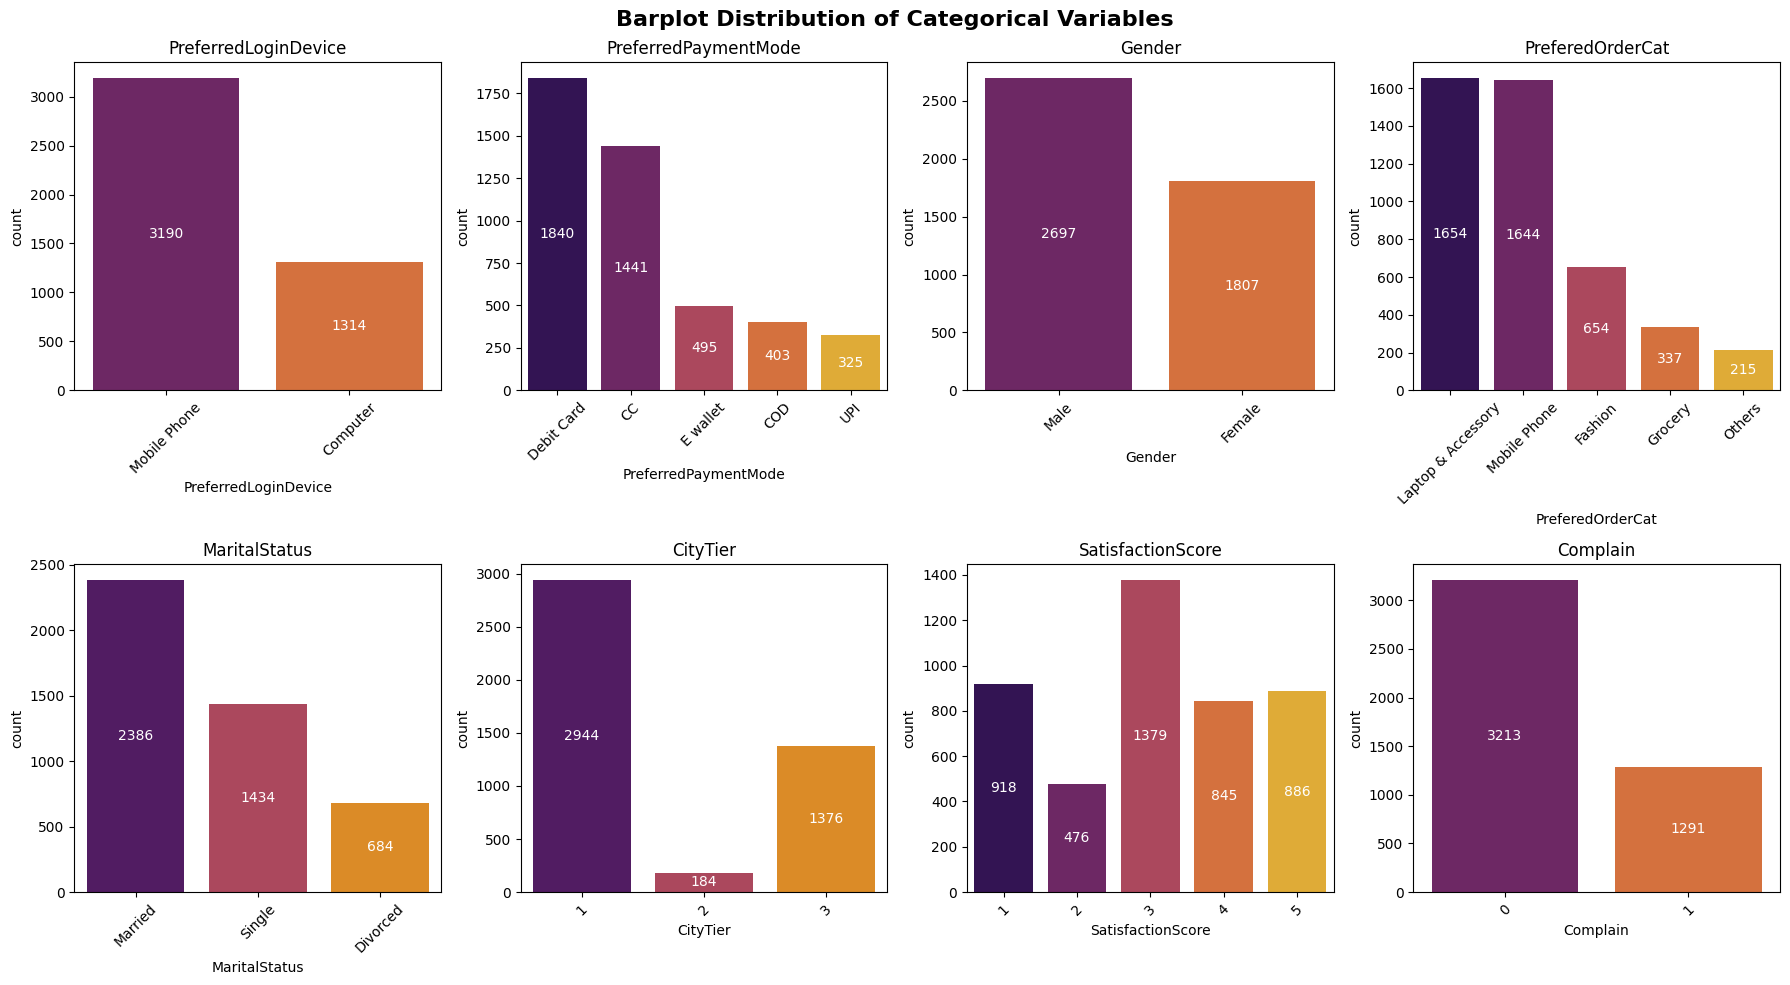

In [58]:
# Membuat subplot untuk barplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()
# Melakukan iterasi untuk setiap kolom kategorik
for i, column in enumerate(column_categoric.columns):
    # Memeriksa apakah kolom adalah salah satu dari yang tidak ingin diurutkan
    if column in ['SatisfactionScore', 'CityTier', 'Complain']:
        # Tidak mengurutkan nilai
        count_plot = sns.countplot(x=df_train[column], ax=axes[i], palette='inferno')
    else:
        # Mengurutkan nilai untuk kolom lainnya
        sorted_values = df_train[column].value_counts().sort_values(ascending=False).index
        count_plot = sns.countplot(x=df_train[column], ax=axes[i], order=sorted_values, palette='inferno')
    # Mengatur judul dan rotasi label x
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    # Menambahkan anotasi di tengah-tengah setiap batang
    for p in count_plot.patches:
        count = int(p.get_height())
        axes[i].text(p.get_x() + p.get_width() / 2., p.get_height() / 2, count,
                     ha='center', va='center', color='white', fontsize=10)
# Menghapus subplot yang tidak digunakan (jika ada)
for i in range(len(column_categoric.columns), len(axes)):
    fig.delaxes(axes[i])
# Menyesuaikan tata letak subplot
plt.suptitle('Barplot Distribution of Categorical Variables', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

`PENJELASAN`

Dilakukan visualiasi data kategorik menggunakan barplot, untuk melihat distribusi data. Didapat bahwa:
- `Kolom PreferredLoginDevice`: Sebagian besar pelanggan menggunakan `Mobile Phone` untuk login, menunjukkan preferensi yang tinggi terhadap perangkat mobile dalam mengakses platform.

- `Kolom PreferredPaymentMode`: Mayoritas pelanggan lebih memilih membayar dengan `Debit Card`, mengindikasikan kecenderungan penggunaan metode pembayaran `cashless`.

- `Kolom Gender`: Jumlah pelanggan `Male (laki-laki)` lebih banyak dibandingkan `Female (perempuan)`, menunjukkan dominasi pengguna laki-laki dalam demografi pelanggan.

- `Kolom PreferredOrderCat`: Kategori produk yang paling diminati adalah `Laptop & Accessory` serta `Mobile Phone`, menandakan fokus pelanggan pada teknologi dan gadget.

- `Kolom MaritalStatus`: Sebagian besar pelanggan berada dalam status `Married`, menunjukkan bahwa pengguna yang berkeluarga mendominasi pangsa pasar.

- `Kolom CityTier`: Mayoritas pelanggan berada di `CityTier 1`, menunjukkan bahwa pengguna dari kota besar lebih banyak berpartisipasi di platform ini.

- `Kolom SatisfactionScore`: Sebagian besar pelanggan memiliki `SatisfactionScore (skor kepuasan) 3`, menunjukkan bahwa tingkat kepuasan pelanggan cenderung berada di level sedang.

- `Kolom Complain`: Sebagian besar pelanggan `tidak melakukan komplain (0)`, menunjukkan bahwa banyak pengguna merasa puas dengan layanan dan produk yang diberikan.



>> ### 3.3.2. CUSTOMER DISTRIBUTION BASED ON CHURN RATE


#### CHURN DEFINITION

In [62]:
# Display 5 pelanggan dengan DaySinceLastOrder > 30 and churn == 0
display(df_train[(df_train['DaySinceLastOrder'] > 30) & (df_train['Churn'] == 0)].head(5))

# Display 5 pelanggan dengan DaySinceLastOrder == 0 and churn == 1
display(df_train[(df_train['DaySinceLastOrder'] == 0) & (df_train['Churn'] == 1)].head(5))

# Display 5 pelanggan dengan DaySinceLastOrder == 0 and churn == 1
display(df_train[(df_train['DaySinceLastOrder'] == 1) & (df_train['Churn'] == 1)].head(5))

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
4305      0     4.0         Mobile Phone        1             12.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4305                  COD  Female             3.0                         4   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
4305     Mobile Phone                 5       Married                7   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4305        0                         15.0         1.0         3.0   

      DaySinceLastOrder  CashbackAmount  
4305               31.0          157.04

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
932       1     0.0             Computer        3             19.0   
2413      1     0.0             Computer        1              NaN   
46        1     0.0             Computer        3              NaN   
1037      1     0.0         Mobile Phone        3             16.0   
1240      1     0.0             Computer        3             30.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
932                   COD  Female             2.0                         3   
2413                   CC    Male             2.0                         4   
46                    COD  Female             3.0                         5   
1037                   CC    Male             2.0                         4   
1240                  COD    Male             2.0                         1   

        PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
932   Laptop & Accessory                 4        Single                6   
2413        Mobile Phone                 5        Single                8   
46          Mobile Phone                 5        Single                1   
1037             Fashion                 5       Married               10   
1240        Mobile Phone                 5        Single                2   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
932         0                         11.0         0.0         1.0   
2413        0                         11.0         1.0         1.0   
46          0                         21.0         1.0         1.0   
1037        0                         17.0         4.0         6.0   
1240        0                         17.0         1.0         1.0   

      DaySinceLastOrder  CashbackAmount  
932                 0.0          157.65  
2413                0.0          125.61  
46                  0.0          123.25  
1037                0.0          203.06  
1240                0.0          110.91

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
4617      1     1.0             Computer        3             12.0   
4827      1     5.0         Mobile Phone        1              9.0   
3912      1     1.0         Mobile Phone        2             29.0   
4128      1     1.0             Computer        3             16.0   
4194      1     1.0         Mobile Phone        1              7.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4617             E wallet    Male             4.0                         4   
4827           Debit Card  Female             3.0                         6   
3912                  UPI    Male             3.0                         6   
4128             E wallet    Male             3.0                         4   
4194                   CC    Male             4.0                         4   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
4617     Mobile Phone                 4        Single                3   
4827     Mobile Phone                 1       Married                6   
3912     Mobile Phone                 3       Married                3   
4128     Mobile Phone                 5       Married                3   
4194     Mobile Phone                 1       Married                4   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4617        1                         15.0         2.0         2.0   
4827        1                         14.0         1.0         2.0   
3912        0                         12.0         1.0         2.0   
4128        0                         20.0         2.0         2.0   
4194        1                         17.0         1.0         3.0   

      DaySinceLastOrder  CashbackAmount  
4617                1.0          143.78  
4827                1.0          152.78  
3912                1.0          140.55  
4128                1.0          142.90  
4194                1.0          147.93

`TEMUAN`

Berdasarkan hasil analisa, ditemukan bahwa, `terdapat pelanggan yang dinyatakan churn dengan nilai DaySinceLastOrder 1 dan bahkan 0`. Artinya pelanggan tersebut baru saja melakukan pembelian 1 hari yang lalu dan bahkan di hari yang sama, namun telah dinyatakan churn.

Dapat disimpulkan bahwa definisi 'Churn' pada dataset ini tidak berkaitan dengan waktu. Sehingga pada analisa ini istilah pelanggan `churn akan didefinisikan sebagai pelanggan yang berhenti menggunakan aplikasi e-commerce dengan menghapus aplikasi e-commerce`, oleh karena itu, 'DaySinceLastOrder` 1 dan bahkan 0 dapat diartikan sebagai pelanggan yang langsung menghapus aplikasi 1 hari setelah atau di hari yang sama setelah mendownload aplikasi e-commerce.

#### DISTRIBUTION BASED ON CHURN RATE

Berdasarkan Ahn dkk, tahun 2020, Churn Rate adalah ratio perbandingan antara pelanggan yang berhenti dari suatu layanan terhadap jumlah keseluruhan pelanggan yang menggunakan layanan tersebut. Churn Rate adalah salah satu indikator yang umum digunakan untuk melihat retensi pelanggan. Adapun, untuk dapat menghitung churn rate, dapat digunakan rumus sebagai berikut: <br> <br>

$$ \text{Churn Rate} = \frac{\text{Number of Customers Lost during Period}}{\text{Total Number of Customers at the Start of the Period}} \times 100\% $$

In [66]:
# Membuat kolom binned tanpa menambahkannya ke df_train
column_binned = {
    'Tenure_Binned': pd.cut(df_train['Tenure'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['<=5', '>5-10', '>10-15', '>15-20', '>20'], include_lowest=True),
    'CashbackAmount_Binned': pd.cut(df_train['CashbackAmount'], bins=[0, 150, 200, 250, 300, float('inf')], labels=['<=150', '>150-200', '>200-250', '>250-300', '>300'], include_lowest=True),
    'WarehouseToHome_Binned': pd.cut(df_train['WarehouseToHome'], bins=[0, 10, 15, 20, float('inf')], labels=['<=10', '>10-15', '>15-20', '>20'], include_lowest=True),
    'NumberOfAddress_Binned': pd.qcut(df_train['NumberOfAddress'], q=5, duplicates='drop', labels=['1-2', '2-3', '3-4', '4-6', '>6']),
    'OrderAmountHikeFromlastYear_Binned': pd.qcut(df_train['OrderAmountHikeFromlastYear'], q=5, duplicates='drop', labels=['10-12', '>12-14', '>14-16', '>16-19', '>19']),
    'CouponUsed_Binned': pd.qcut(df_train['CouponUsed'], q=5, duplicates='drop', labels=['0-1', '>1-2', '>2']),
    'OrderCount_Binned': pd.qcut(df_train['OrderCount'], q=5, duplicates='drop', labels=['1-2', '>2-4', '>4']),
    'DaySinceLastOrder_Binned': pd.qcut(df_train['DaySinceLastOrder'], q=5, labels=['0-1', '>1-3', '>3-4', '>4-8', '>8'])
}

In [67]:
# Membuat DataFrame baru dengan kolom-kolom yang telah dibinned
df_binned = pd.DataFrame(column_binned)
df_binned['Churn'] = df_train['Churn']
df_binned

Tenure_Binned CashbackAmount_Binned WarehouseToHome_Binned  \
716            <=5                 <=150                    >20   
2779           >20                 <=150                    >20   
203          >5-10                 <=150                 >15-20   
3287        >15-20              >150-200                   <=10   
5465           >20              >150-200                 >10-15   
...            ...                   ...                    ...   
1661           >20              >200-250                   <=10   
2139         >5-10              >150-200                   <=10   
3779        >10-15              >150-200                 >15-20   
4488         >5-10              >150-200                 >15-20   
864          >5-10                 <=150                   <=10   

     NumberOfAddress_Binned OrderAmountHikeFromlastYear_Binned  \
716                      >6                                >19   
2779                    2-3                             >14-16   
203                     3-4                             >12-14   
3287                     >6                             >12-14   
5465                    4-6                             >14-16   
...                     ...                                ...   
1661                     >6                              10-12   
2139                    1-2                             >16-19   
3779                    2-3                             >16-19   
4488                    4-6                             >14-16   
864                      >6                             >14-16   

     CouponUsed_Binned OrderCount_Binned DaySinceLastOrder_Binned  Churn  
716                0-1               1-2                     >1-3      0  
2779               0-1               1-2                      0-1      0  
203                0-1               1-2                      0-1      0  
3287               0-1               1-2                     >1-3      0  
5465              >1-2               1-2                     >4-8      0  
...                ...               ...                      ...    ...  
1661               0-1               NaN                     >4-8      0  
2139               0-1               1-2                     >3-4      0  
3779               0-1              >2-4                     >4-8      0  
4488              >1-2               1-2                     >1-3      0  
864                0-1               1-2                     >1-3      0  

[4504 rows x 9 columns]

/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/764606803.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_binned.groupby(column)['Churn'].mean() * 100  # Rata-rata nilai 'Churn' per kategori sebagai churn rate


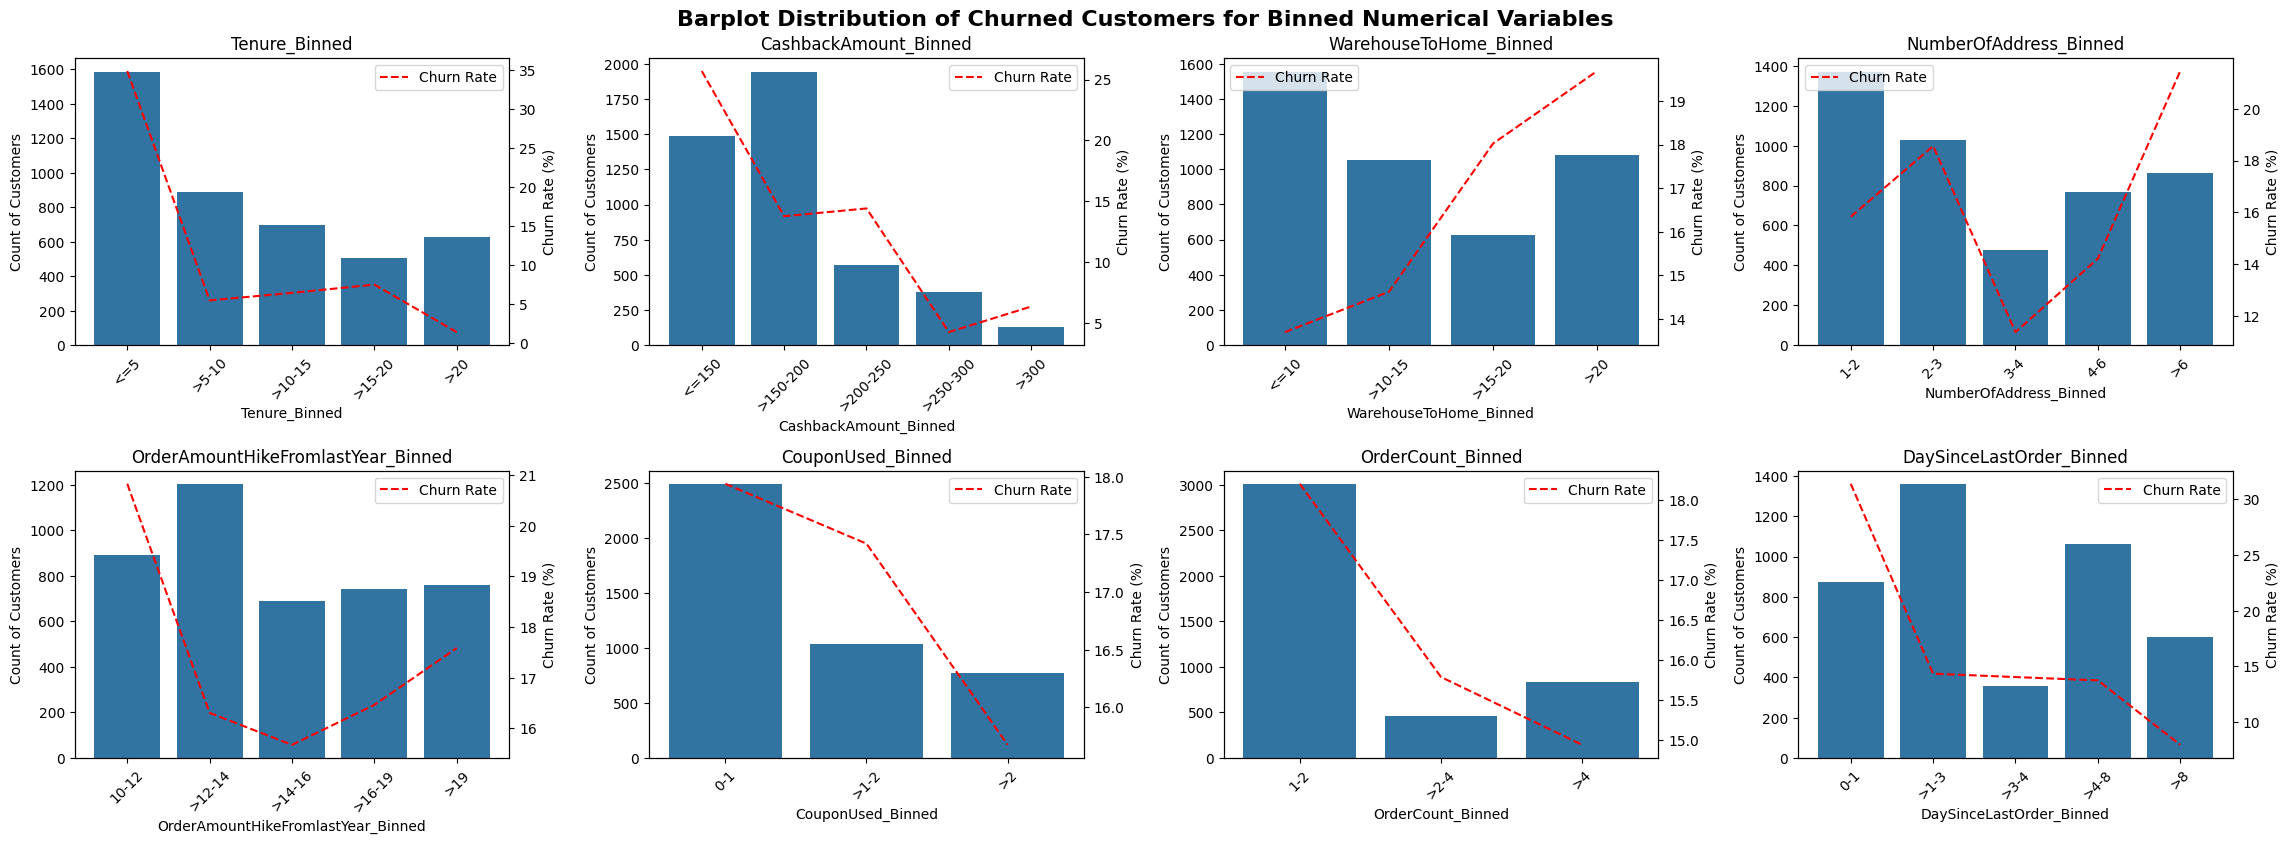

In [68]:
# Menghitung churn rate untuk setiap kategori di kolom numerik yang sudah di-binning 
churn_rate_numeric_dict = {}
for column in df_binned.columns[:-1]:  # Exclude 'Churn' column
    churn_rate = df_binned.groupby(column)['Churn'].mean() * 100  # Rata-rata nilai 'Churn' per kategori sebagai churn rate
    churn_rate_numeric_dict[column] = churn_rate

# Membuat subplot untuk barplot kolom numerik
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(23, 12))
axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom numerik yang sudah di-binning
for i, column in enumerate(df_binned.columns[:-1]):  # Exclude 'Churn' column for plotting
    sns.countplot(x=df_binned[column], ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].set_ylabel("Count of Customers")

    # Membuat sumbu y kedua untuk churn rate
    ax2 = axes[i].twinx()
    churn_rate = churn_rate_numeric_dict[column].values  # Mendapatkan churn rate untuk kategori saat ini
    sns.lineplot(x=range(len(churn_rate)), y=churn_rate, ax=ax2, color='red', label='Churn Rate', linestyle='--')  # Line chart untuk churn rate
    ax2.set_ylabel("Churn Rate (%)")
    ax2.tick_params(axis='y')

# Menghapus subplot yang tidak digunakan
for i in range(len(df_binned.columns) - 1, len(axes)):
    fig.delaxes(axes[i])

# Menyesuaikan tata letak subplot
plt.suptitle('Barplot Distribution of Churned Customers for Binned Numerical Variables', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

`TEMUAN`

Berdasarkan hasil analisa, diketahui bahwa:

- `Tenure`: `Semakin tinggi tenure pelanggan maka kecenderungan churn semakin rendah`, menandakan bahwa pelanggan dengan masa keanggotaan yang lebih lama cenderung lebih setia dan bertahan di platform.

- `WarehouseToHome`: `Semakin jauh jarak antara gudang dan rumah pelanggan maka kecenderungan churn semakin tinggi`, menunjukkan bahwa pelanggan yang tinggal lebih jauh dari gudang mungkin merasa kurang puas dengan waktu atau biaya pengiriman, sehingga lebih rentan terhadap churn.

- `HourSpendOnApp`: Tidak ada hubungan yang signifikan antara waktu yang dihabiskan di aplikasi dengan kecenderungan churn.

- `NumberOfDeviceRegistered`: `Semakin banyak perangkat yang terdaftar maka kecenderungan churn semakin tinggi`, menandakan bahwa pelanggan dengan perangkat yang lebih sedikit (1-2) lebih puas atau lebih mudah dikelola.

- `NumberOfAddress`: Tidak ada hubungan yang signifikan antara jumlah alamat dengan kecenderungan churn.

- `OrderAmountHikeFromlastYear`: Tidak ada hubungan yang signifikan antara kenaikan jumlah pesanan dari tahun sebelumnya dengan kecenderungan churn.

- `CouponUsed (1 bulan terakhir)`: `Semakin sedikit kupon yang digunakan pelanggan maka kecenderungan churn semakin tinggi`, menunjukkan bahwa pelanggan yang mendapatkan insentif kupon cenderung lebih bertahan di platform.

- `OrderCount (1 bulan terakhir)`: `Semakin rendah jumlah pesanan (1-2) maka kecenderungan churn semakin tinggi`, menandakan bahwa pelanggan yang sering melakukan pemesanan lebih terlibat dan cenderung lebih loyal.

- `DaySinceLastOrder`: `Semakin lama waktu sejak pesanan terakhir maka kecenderungan churn semakin rendah`, yang mungkin menunjukkan bahwa pelanggan yang tidak aktif dalam jangka waktu lama lebih disebabkan oleh ketidakaktifan daripada ketidakpuasan.

- `CashbackAmount (1 bulan terakhir)`: `Semakin tinggi rata-rata cashback yang diterima maka kecenderungan churn semakin rendah`, menunjukkan bahwa insentif finansial memiliki dampak positif terhadap retensi pelanggan.


In [70]:
# df_train['PreferedOrderCat'] = df_train['PreferedOrderCat'].replace({'Mobile Phone':'Electronic','Laptop & Accessory':'Electronic'})

/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/481572634.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=df_train[column], ax=axes[i], palette='inferno', order=ordered_categories)
/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/481572634.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=df_train[column], ax=axes[i], palette='inferno', order=ordered_categories)
/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/481572634.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

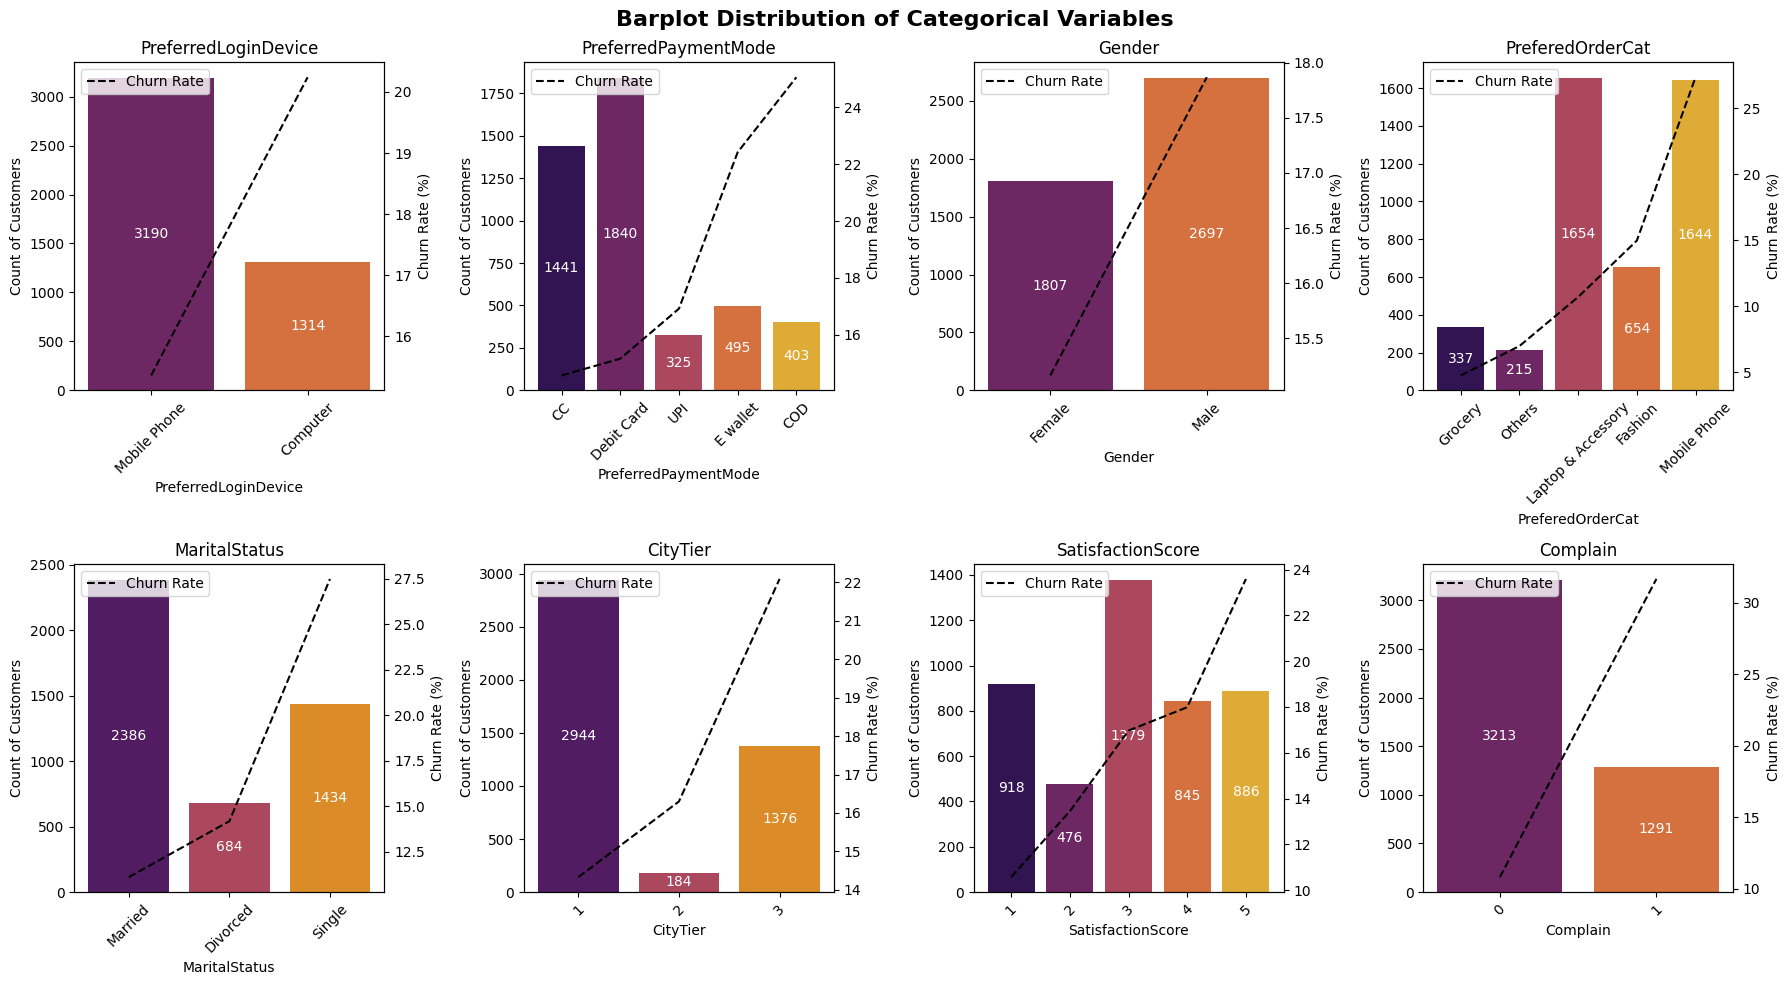

In [71]:
# Menghitung churn rate untuk setiap kategori di kolom yang relevan
churn_rate_dict = {}

for column in column_categoric:
    churn_rate = df_train.groupby(column)['Churn'].mean()  # Rata-rata nilai 'Churn' per kategori sebagai churn rate
    churn_rate_dict[column] = churn_rate

# Membuat subplot untuk barplot dengan dual axis
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom kategorik
for i, column in enumerate(column_categoric.columns):
    # Mendapatkan urutan kategori berdasarkan churn rate dari yang paling rendah ke yang paling tinggi
    ordered_categories = churn_rate_dict[column].sort_values(ascending=True).index.tolist()

    # Membuat countplot dengan urutan kategori yang telah ditentukan
    count_plot = sns.countplot(x=df_train[column], ax=axes[i], palette='inferno', order=ordered_categories)

    # Mengatur judul dan rotasi label x
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

    # Menambahkan anotasi di tengah-tengah setiap batang
    for p in count_plot.patches:
        count = int(p.get_height())
        axes[i].text(p.get_x() + p.get_width() / 2., p.get_height() / 2, count,
                     ha='center', va='center', color='white', fontsize=10)
        axes[i].set_ylabel("Count of Customers")


    # Membuat sumbu y kedua untuk churn rate
    if column in churn_rate_dict:
        ax2 = axes[i].twinx()
        churn_rate = (churn_rate_dict[column].reindex(ordered_categories).values * 100).round(2) # Mendapatkan churn rate untuk kategori saat ini sesuai urutan

        # Menggambar lineplot dengan marker
        line_plot = sns.lineplot(x=range(len(churn_rate)), y=churn_rate, ax=ax2, label='Churn Rate',
                                 color='black', linestyle='--')

        ax2.set_ylabel("Churn Rate (%)")
        ax2.tick_params(axis='y')

# Menghapus subplot yang tidak digunakan (jika ada)
for i in range(len(column_categoric.columns), len(axes)):
    fig.delaxes(axes[i])

# Menyesuaikan tata letak subplot
plt.suptitle('Barplot Distribution of Categorical Variables', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

`TEMUAN`

- `PreferredLoginDevice`: `Sebagian besar pelanggan yang menggunakan Computer memiliki churn rate yang lebih tinggi` dibandingkan pengguna Mobile Phone. Hal ini mungkin disebabkan oleh interface yang kurang user-friendly pada perangkat komputer atau laptop. Salah satu solusi untuk mengurangi churn pada pengguna komputer adalah dengan mengarahkan pelanggan untuk menggunakan aplikasi mobile dengan memperbanyak promo eksklusif yang hanya bisa diakses melalui mobile.

- `PreferredPaymentMode`: `Pelanggan yang menggunakan Credit Card (CC) memiliki churn rate yang lebih tinggi` dibandingkan dengan metode pembayaran lainnya, seperti E-wallet atau COD (Cash on Delivery). Ini bisa jadi karena pelanggan yang menggunakan CC mungkin merasa terbebani oleh biaya tambahan atau kekhawatiran keamanan. Solusi untuk mengatasi churn ini adalah dengan memberikan insentif atau cashback khusus untuk pengguna CC, atau mendorong penggunaan metode pembayaran alternatif seperti e-wallet dengan promosi diskon.

- `Gender`: `Pria memiliki churn rate yang lebih tinggi` dibandingkan wanita, yang mungkin mengindikasikan bahwa pria kurang terlibat atau memiliki kebutuhan yang berbeda saat menggunakan layanan ini. Salah satu pendekatan untuk mengurangi churn pada pelanggan pria adalah dengan membuat kampanye pemasaran yang lebih menarik atau mengadakan promosi produk yang relevan dengan minat mereka, seperti teknologi atau perangkat elektronik.

- `PreferredOrderCat`: `Kategori produk Mobile Phone memiliki churn rate yang lebih tinggi` dibandingkan kategori lainnya seperti Grocery. Pelanggan kategori ini mungkin lebih rentan untuk churn karena produk ini sering kali bersifat sekali beli dan jarang dibutuhkan pembelian ulang. Solusi untuk meningkatkan retensi adalah dengan menawarkan layanan atau produk pelengkap yang relevan, seperti aksesori mobile, paket asuransi, atau layanan purna jual untuk memperpanjang siklus pembelian.

- `MaritalStatus`: `Pelanggan single memiliki churn rate yang lebih tinggi` dibandingkan dengan pelanggan yang married atau divorced. Hal ini mungkin karena pelanggan yang single cenderung memiliki keterikatan yang lebih rendah terhadap layanan. Solusi yang dapat diterapkan adalah membuat program loyalitas yang menarik bagi pelanggan single, seperti reward berdasarkan aktivitas atau poin yang dapat ditukar dengan diskon atau hadiah, untuk meningkatkan keterlibatan mereka.

- `CityTier`: `Pelanggan dari CityTier 3 memiliki churn rate yang lebih tinggi` dibandingkan pelanggan dari CityTier 1 atau 2. Ini mungkin disebabkan oleh akses yang lebih terbatas terhadap pengiriman cepat atau biaya pengiriman yang lebih tinggi. Solusi untuk mengurangi churn di area ini adalah dengan menawarkan biaya pengiriman yang lebih kompetitif atau pengiriman gratis untuk pembelian di atas nominal tertentu di wilayah CityTier 3.

- `SatisfactionScore`: `Semakin tinggi SatisfactionScore pelanggan maka churn rate semakin tinggi`, menunjukkan bahwa pelanggan dengan skor kepuasan yang tinggi mungkin memiliki ekspektasi yang lebih tinggi atau kebutuhan yang berbeda yang tidak sepenuhnya terpenuhi. Untuk mengurangi churn pada kelompok ini, perusahaan dapat meningkatkan personalisasi layanan dan memperhatikan kebutuhan spesifik pelanggan yang memiliki skor kepuasan tinggi.

- `Complain`: `Pelanggan yang pernah mengajukan komplain dalam 1 bulan terakhir memiliki churn rate yang lebih tinggi` dibandingkan dengan yang tidak pernah mengajukan komplain, menandakan bahwa pengalaman negatif berperan besar dalam churn. Sebagai solusi, perusahaan perlu menindaklanjuti setiap keluhan dengan baik, menawarkan kompensasi bila perlu, dan melakukan tindak lanjut pasca-komplain untuk memastikan masalah telah terselesaikan secara memuaskan.

Maka dari itu dapat dijawab business question pertama `Faktor apa saja yang berpengaruh terhadap potensi churn pelanggan?`, yaitu:

Faktor-faktor yang berpengaruh terhadap potensi churn pelanggan meliputi `Tenure`, `WarehouseToHome`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`, `CashbackAmount`, `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferredOrderCat`, `MaritalStatus`, `CityTier`, `SatisfactionScore`, dan `Complain`. Faktor-faktor ini menunjukkan pola di mana pelanggan yang mendapatkan insentif, memiliki akses yang lebih mudah, dan sering melakukan interaksi atau transaksi di platform cenderung lebih loyal. Sebaliknya, pelanggan yang memiliki hambatan akses, jarang menerima insentif, atau memiliki keterlibatan rendah lebih rentan untuk churn.

# 4. DATA CLEANING

> ## 4.1. HANDLING MISSING VALUE

In [76]:
# Melakukan imputasi missing value dengan median
for column in df_train.select_dtypes(include=np.number):
  df_train[column].fillna(df_train[column].median(), inplace=True)

/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/2539838670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].median(), inplace=True)


In [77]:
# Periksa kembali missing value
missing_data = pd.DataFrame(data = df_train.isna().sum(), columns = ['Missing Values'])
missing_data['Percentage'] = round((df_train.isna().sum()/len(df_train))*100,2)
missing_data

Missing Values  Percentage
Churn                                     0         0.0
Tenure                                    0         0.0
PreferredLoginDevice                      0         0.0
CityTier                                  0         0.0
WarehouseToHome                           0         0.0
PreferredPaymentMode                      0         0.0
Gender                                    0         0.0
HourSpendOnApp                            0         0.0
NumberOfDeviceRegistered                  0         0.0
PreferedOrderCat                          0         0.0
SatisfactionScore                         0         0.0
MaritalStatus                             0         0.0
NumberOfAddress                           0         0.0
Complain                                  0         0.0
OrderAmountHikeFromlastYear               0         0.0
CouponUsed                                0         0.0
OrderCount                                0         0.0
DaySinceLastOrder                         0         0.0
CashbackAmount                            0         0.0

`PENJELASAN`

Dilakukan penganan terhadap missing value dengan melakan imputasi menggunakan nilai median dikarenakan data terdistribusi tidak normal dan  lebih tahan terhadap outlier.

Setelah itu, dilakukan pengecekan ulang jumlah dan persentase missing values di setiap kolom, untuk memastikan penanganan missing values berjalan dengan baik.

> ## 4.2. HANDLING DUPLICATE

In [80]:
# Melihat jumlah data yang duplikat dan tidak duplikat
print(f'''Sebelum dilakukan penanganan data duplikat:
{df_train.duplicated().value_counts()}''')

# Membuang data duplicate
df_train.drop_duplicates(subset=df_train.columns, keep='first', inplace= True)

# Memastikan data duplikat telah dihapus
print(f'''
Setelah dilakukan penanganan data duplikat:
{df_train.duplicated().value_counts()}''')

Sebelum dilakukan penanganan data duplikat:
False    4163
True      341
Name: count, dtype: int64

Setelah dilakukan penanganan data duplikat:
False    4163
Name: count, dtype: int64


`PENJELASAN`

Dilihat dari hasil di atas, kita dapat mengetahui jumlah data yang duplikat dan tidak duplikat pada dataset. Setelah dilakukan penghapusan, data duplikat berhasil dihapus dan dataset telah bersih dari duplikasi. Duplikat dilakukan untuk menghindari bias pada model terhadap salah satu kelas data.

> ## 4.3. HANDLING OUTLIER

In [83]:
def drop_outliers(df):
    # Kondisi yang benar untuk setiap kolom
    # df = df[(df['Tenure'] >= 2.0) & (df['Tenure'] <= 21.0)]
    df = df[(df['WarehouseToHome'] >= 0) & (df['WarehouseToHome'] <= 39)]
    df = df[(df['NumberOfAddress'] >= 0) & (df['NumberOfAddress'] <= 12)]  
    return df

# Menerapkan fungsi pada df_train
df_train = drop_outliers(df_train)

`PENJELASAN`

Berdasarkan hasil analisis yang dilakukan, outlier pada kolom WarehouseToHome dan NumberOfAddress telah berhasil diidentifikasi dan dihapus dari dataset. Penghapusan outlier ini dilakukan karena terdapat nilai-nilai yang tidak realistis dan berada di luar batas yang wajar, yang dapat memengaruhi akurasi model analisis dan prediksi. Dengan mengeliminasi outlier, dataset kini lebih bersih dan diharapkan dapat memberikan hasil yang lebih valid dan representatif dalam analisis selanjutnya.

# 5. MODELING AND EVALUATION

> ## 5.1. DATA PREPROCESSING

>> #### 5.1.1. DEFINE TARGET

In [88]:
# Tentukan X sebagai seluruh dataset dan y sebagai target
X = df_train.drop(['Churn'], axis=1)
y = df_train['Churn']

>> #### 5.1.2. SCALING AND ENCODING

In [90]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Kolom yang akan menggunakan ordinal encoding
ordinal_features = ['CityTier','SatisfactionScore']
ordinal_categories = [
    [1, 2, 3],            # Urutan terendah ke tertinggi untuk CityTier
    [1, 2, 3, 4, 5]       # Urutan terendah ke tertinggi untuk SatisfactionScore
]

# Bagi kolom kategorikal menjadi ordinal dan one-hot encoding
onehot_cols = [col for col in categorical_cols if col not in ordinal_features]

# Definisikan transformer untuk masing-masing tipe kolom
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Buat preprocessor dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('onehot', onehot_transformer, onehot_cols)
    ],
    remainder='drop'  # Drop kolom yang tidak di-encode
)

# Transformasi dataset
X_encoded = preprocessor.fit_transform(X)

# Dapatkan nama fitur untuk kolom numerik, ordinal, dan one-hot encoded
numerical_feature_names = numerical_cols.tolist()
ordinal_feature_names = ordinal_features
onehot_feature_names = list(preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols))

# Buat DataFrame terpisah untuk setiap jenis fitur
X_scaled_df = pd.DataFrame(X_encoded[:, :len(numerical_feature_names)], columns=numerical_feature_names)
X_ordinal_df = pd.DataFrame(X_encoded[:, len(numerical_feature_names):len(numerical_feature_names) + len(ordinal_feature_names)], columns=ordinal_feature_names)
X_onehot_df = pd.DataFrame(X_encoded[:, len(numerical_feature_names) + len(ordinal_feature_names):], columns=onehot_feature_names)

# Tampilkan hasil transformasi
print("Scaled Numerical Features:")
display(X_scaled_df.head())

print("\nOrdinal Encoded Features:")
display(X_ordinal_df.head())

print("\nOne-Hot Encoded Categorical Features:")
display(X_onehot_df.head())

Scaled Numerical Features:


Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0 -0.692308              1.6            -1.0                      -1.0   
1  1.230769              2.1            -1.0                      -1.0   
2 -0.230769              0.2            -1.0                       0.0   
3  0.538462             -0.7             0.0                       1.0   
4  1.461538              0.0             1.0                       0.0   

   NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0             1.50                          1.4         0.0        -0.5   
1             0.00                          0.0         0.0        -0.5   
2             0.25                         -0.2         0.0        -0.5   
3             2.00                         -0.2         0.0         0.0   
4             0.75                          0.2         1.0         0.0   

   DaySinceLastOrder  CashbackAmount  
0               -0.2       -0.543423  
1               -0.6       -0.565766  
2               -0.4       -0.332621  
3                0.0        0.421216  
4                1.0        0.575092


Ordinal Encoded Features:


CityTier  SatisfactionScore
0       0.0                3.0
1       2.0                0.0
2       2.0                1.0
3       0.0                1.0
4       0.0                0.0


One-Hot Encoded Categorical Features:


PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone  \
0                            0.0                                1.0   
1                            1.0                                0.0   
2                            1.0                                0.0   
3                            0.0                                1.0   
4                            0.0                                1.0   

   PreferredPaymentMode_CC  PreferredPaymentMode_COD  \
0                      1.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      1.0                       0.0   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                              0.0                            0.0   
1                              1.0                            0.0   
2                              0.0                            1.0   
3                              1.0                            0.0   
4                              0.0                            0.0   

   PreferredPaymentMode_UPI  Gender_Female  Gender_Male  \
0                       0.0            0.0          1.0   
1                       0.0            0.0          1.0   
2                       0.0            0.0          1.0   
3                       0.0            1.0          0.0   
4                       0.0            1.0          0.0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                  0.0                            1.0   
1                                  0.0                            1.0   
2                                  1.0                            0.0   
3                                  1.0                            0.0   
4                                  1.0                            0.0   

   PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                      0.0                     0.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    0.0   
3                      0.0                     1.0                    0.0   
4                      0.0                     0.0                    1.0   

   MaritalStatus_Single  Complain_0  Complain_1  
0                   1.0         1.0         0.0  
1                   0.0         1.0         0.0  
2                   1.0         1.0         0.0  
3                   0.0         0.0         1.0  
4                   0.0         1.0         0.0

Berdasarkan hasil analisa pada tahap *Exploratory Data Analysis*, telah dilakukan beberapa data preprocessing, yaitu scaling dan encoding dengan metode sebagai berikut:

`SCALING`

`Robust Scaler`
- Tujuan: Menangani data yang memiliki `outlier` atau pencilan.
* Cara Kerja: Robust Scaler mengurangi dampak outlier dengan mengubah skala data berdasarkan interquartile range (IQR), yaitu dengan mengurangi nilai median dan membaginya dengan IQR (selisih antara kuartil ke-75 dan kuartil ke-25).
* Kelebihan: Cocok untuk data dengan pencilan ekstrem karena tidak sensitif terhadap nilai-nilai ekstrem, berbeda dengan standar scaler yang bisa dipengaruhi oleh outlier.

`ENCODING`

`OneHotEncoder`
* Tujuan: Mengonversi variabel kategoris menjadi format `numerik biner` untuk digunakan dalam model machine learning.
* Cara Kerja: OneHotEncoder membuat kolom baru untuk setiap kategori unik pada fitur tersebut, dan setiap baris diberi nilai 1 pada kolom kategori yang relevan dan 0 pada kolom lainnya.
* Kelebihan: Berguna untuk variabel kategoris yang tidak memiliki urutan tertentu (nominal), misalnya "warna" atau "kota". Hasil encoding ini menghindari asumsi hubungan ordinal antara kategori.

> ## 5.2. MODELING

>> #### 5.2.1. MODELING (DEFAULT PARAMETER)

Dilakukan modeling machine learning dengan menggunakan beberapa algoritma, berikut adalah penjelasan singkat pada setiap jenisnya:

1. `Logistic Regression`: adalah model statistik yang digunakan untuk memprediksi probabilitas kelas biner (misalnya 0 atau 1). Model ini sederhana dan efektif untuk kasus linear, terutama untuk memprediksi probabilitas hasil tertentu.

2. `Decision Tree` : Model ini bekerja dengan membagi data ke dalam subset berdasarkan fitur yang paling memisahkan target klasifikasi. Decision tree mudah diinterpretasi karena menyerupai diagram alur keputusan.

3. `K-Nearest Neighbors (KNN)`: KNN adalah algoritma non-parametrik yang mengklasifikasikan titik data berdasarkan kelas tetangga terdekatnya. Ini sangat cocok untuk data kecil tetapi bisa lambat untuk data besar.

4. `Support Vector Machine (SVM)`: SVM berusaha menemukan hyperplane optimal yang memisahkan kelas-kelas dengan margin terbesar. SVM biasanya efektif pada data yang bersifat non-linear dan bekerja dengan baik pada data berdimensi tinggi.

5. `Random Forest`: adalah ensemble dari banyak decision tree yang dibangun dengan subset data. Model ini mengurangi overfitting yang sering terjadi pada decision tree tunggal dan biasanya memiliki akurasi lebih tinggi.

6. `Gradient Boosting`: adalah teknik ensemble yang membangun model secara bertahap dengan menggabungkan model-model lemah (biasanya decision tree kecil). Contoh popularnya adalah XGBoost, LightGBM, dan CatBoost yang sangat efektif pada data tabular.

7. `Naive Bayes`: Model ini didasarkan pada Teorema Bayes dengan asumsi bahwa fitur bersifat independen. Naive Bayes sangat cepat dan sederhana, cocok untuk masalah teks dan klasifikasi berbasis probabilitas.

8. `AdaBoost`: adalah teknik boosting yang fokus pada kesalahan dari model sebelumnya, memberi bobot lebih besar pada kesalahan untuk iterasi berikutnya. Ini menggabungkan beberapa model sederhana (biasanya decision tree) untuk menciptakan model kuat.

9. `CatBoost`: adalah model boosting yang dioptimalkan untuk menangani data kategori tanpa perlu one-hot encoding. Ini sangat cocok untuk data dengan banyak fitur kategori dan biasanya lebih efisien dibanding model boosting lainnya.

10. `XGBoost`: adalah salah satu algoritma gradient boosting yang sangat efisien dan cepat, populer di kompetisi data science. Algoritma ini melakukan regularisasi tambahan untuk meningkatkan performa dan mencegah overfitting.

Model di scoring berdasarkan f2 score dan akan digunakan untuk memprediksi nilai pada data X_test. Hasil prediksi tersebut akan menjadi `benchmark nilai model sebelum melakukan hyperparameter tuning` pada tahapan berikutnya.

In [95]:
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Define F2-score as a custom scoring metric
f2_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

# Define different classifiers to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=2024),
    'Decision Tree': DecisionTreeClassifier(random_state=2024),
    'K-Nearest Neighbors': KNeighborsClassifier(),  # KNN tidak punya random state
    'Support Vector Machine': SVC(probability=True, random_state=2024),
    'Random Forest': RandomForestClassifier(random_state=2024),
    'Gradient Boosting': GradientBoostingClassifier(random_state=2024),
    'AdaBoost': AdaBoostClassifier(random_state=2024),
    'Naive Bayes': GaussianNB(),  # Naive Bayes tidak punya random state
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2024),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=2024)
}

# Initialize a list to store results
results = []

# Evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name} with default parameters...")

    # Create the pipeline with oversampling and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversample', RandomOverSampler(random_state=2024)),
        ('classifier', model)
    ])

    # Measure training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    fitting_time = time.time() - start_time

    # Predict and calculate F2 scores
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_f2_score = fbeta_score(y_train, y_train_pred, beta=2, average='weighted')
    test_f2_score = fbeta_score(y_test, y_test_pred, beta=2, average='weighted')
    f2_diff = train_f2_score - test_f2_score

    # Cross-validation F2 score and ROC-AUC score
    cv_f2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f2_scorer, n_jobs=-1)
    cv_f2_mean = cv_f2_scores.mean()
    cv_f2_std = cv_f2_scores.std()

    # Append the results for this model to the results list
    results.append({
        'Model': name,
        'Fitting Time (s)': round(fitting_time, 3),
        'Train_F2-Score': round(train_f2_score, 3),
        'Test_F2-score': round(test_f2_score, 3),
        'F2_Diff': round(f2_diff, 3),
        'CV_F2_Score': round(cv_f2_mean, 3),
        'CV_F2_Std': round(cv_f2_std, 3),
    })

Training and evaluating Logistic Regression with default parameters...
Training and evaluating Decision Tree with default parameters...
Training and evaluating K-Nearest Neighbors with default parameters...
Training and evaluating Support Vector Machine with default parameters...
Training and evaluating Random Forest with default parameters...
Training and evaluating Gradient Boosting with default parameters...
Training and evaluating AdaBoost with default parameters...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Training and evaluating Naive Bayes with default parameters...
Training and evaluating XGBoost with default parameters...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Training and evaluating CatBoost with default parameters...


In [96]:
# Convert results to a DataFrame and sort by Test_F2-score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test_F2-score', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
results_df

Model  Fitting Time (s)  Train_F2-Score  Test_F2-score  \
0           Random Forest             0.232           1.000          0.964   
1                 XGBoost             0.063           1.000          0.960   
2                CatBoost             1.653           0.994          0.952   
3           Decision Tree             0.032           1.000          0.920   
4  Support Vector Machine             1.411           0.910          0.880   
5       Gradient Boosting             0.487           0.913          0.879   
6     K-Nearest Neighbors             0.009           0.926          0.856   
7                AdaBoost             0.129           0.852          0.833   
8     Logistic Regression             0.087           0.813          0.806   
9             Naive Bayes             0.007           0.638          0.635   

   F2_Diff  CV_F2_Score  CV_F2_Std  
0    0.036        0.941      0.005  
1    0.040        0.946      0.005  
2    0.042        0.945      0.006  
3    0.080        0.910      0.009  
4    0.030        0.875      0.014  
5    0.034        0.897      0.010  
6    0.070        0.845      0.013  
7    0.019        0.844      0.012  
8    0.007        0.813      0.016  
9    0.003        0.631      0.020

`PENJELASAN`

Berdasarkan perbandingan model, tiga kandidat teratas untuk tuning hyperparameter lebih lanjut adalah `CatBoost, Random Forest, dan XGBoost`:
<br>**Ketiga model menunjukkan performa yang sangat baik dengan test F2-score > 0.95**
- `Random Forest`: memberikan test F2-score tertinggi (0.964) dengan gap train-test terkecil (0.036)
- `XGBoost`: XGBoost memiliki CV F2_Score tertinggi (0.946) dengan standar deviasi rendah (0.005)
- `CatBoost`: menunjukkan performa yang konsisten namun membutuhkan waktu fitting paling lama

Model-model ini memberikan keseimbangan yang ideal antara recall dan generalisasi, menjadikannya kandidat terbaik untuk tuning lebih lanjut.

>> #### 5.2.2. MODELING (HYPERPARAMETER TUNED)

`Hyperparameter Tuning` adalah proses untuk menemukan kombinasi terbaik dari hyperparameter dalam suatu model machine learning guna meningkatkan performanya. Hyperparameter adalah parameter yang nilainya ditetapkan sebelum proses pelatihan model dimulai, berbeda dengan parameter model yang dipelajari selama pelatihan (seperti bobot pada neural network atau koefisien pada regresi linear).

`Tujuan Hyperparameter Tuning` adalah untuk mendapatkan model dengan performa terbaik pada data validasi atau data test, sehingga model tersebut mampu menghasilkan prediksi yang lebih akurat dan mampu melakukan generalisasi dengan baik pada data baru.

In [100]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define F2-score as a custom scoring metric
f2_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Define the classifiers, including the ones we want to tune
models = {
    'Random Forest': RandomForestClassifier(random_state=2024),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2024),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=2024)
}

# Define hyperparameters to tune for specific models
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300, 500],
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__bootstrap': [True, False]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200, 300, 500],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 5, 7, 10],
        'classifier__subsample': [0.7, 0.8, 0.9],
        'classifier__colsample_bytree': [0.7, 0.8, 1.0]
    },
    'CatBoost': {
        'classifier__iterations': [200, 300, 500],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__depth': [6, 8, 10],
        'classifier__l2_leaf_reg': [3, 5, 7],
        'classifier__border_count': [32, 64, 128],
        'classifier__random_strength': [1, 2, 5]
    }
}

# Initialize a list to store results
results = []

# Evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name} with {'hyperparameter tuning' if name in param_grids else 'default parameters'}...")

    # Create the pipeline with oversampling and model
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', RandomOverSampler(random_state=2024)),
    ('classifier', model)
    ])


    # Hyperparameter tuning for specified models
    if name in param_grids:
        gscv = GridSearchCV(pipeline, param_grids[name], scoring=f2_scorer, cv=3, n_jobs=-1)
        start_time = time.time()
        gscv.fit(X_train, y_train)
        best_pipeline = gscv.best_estimator_
        fitting_time = time.time() - start_time
        print(f"Best parameters for {name}: {gscv.best_params_}")
    else:
        # Train with default parameters
        start_time = time.time()
        pipeline.fit(X_train, y_train)
        best_pipeline = pipeline
        fitting_time = time.time() - start_time

    # Predict and calculate F2 scores
    y_train_pred = best_pipeline.predict(X_train)
    y_test_pred = best_pipeline.predict(X_test)

    train_f2_score = fbeta_score(y_train, y_train_pred, beta=2, average='weighted')
    test_f2_score = fbeta_score(y_test, y_test_pred, beta=2, average='weighted')
    f2_diff = train_f2_score - test_f2_score

    # Cross-validation F2 score and ROC-AUC score
    cv_f2_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring=f2_scorer, n_jobs=-1)
    cv_f2_mean = cv_f2_scores.mean()
    cv_f2_std = cv_f2_scores.std()

    # Append the results for this model to the results list
    results.append({
        'Model': name,
        'Fitting Time (s)': round(fitting_time, 3),
        'Train_F2-score': round(train_f2_score, 3),
        'Test_F2-score': round(test_f2_score, 3),
        'F2_Diff': round(f2_diff, 3),
        'CV_F2_Score': round(cv_f2_mean, 3),
        'CV_F2_Std': round(cv_f2_std, 3),
    })

Training and evaluating Random Forest with hyperparameter tuning...
Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Training and evaluating XGBoost with hyperparameter tuning...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters for XGBoost: {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Training and evaluating CatBoost with hyperparameter tuning...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:18:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters for CatBoost: {'classifier__border_count': 32, 'classifier__depth': 10, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 2}


In [101]:
# Convert results to a DataFrame and sort by Test_F2-score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test_F2-score', ascending=False).reset_index(drop=True)
results_df

Model  Fitting Time (s)  Train_F2-score  Test_F2-score  F2_Diff  \
0       CatBoost           494.993             1.0          0.966    0.034   
1        XGBoost            23.865             1.0          0.965    0.035   
2  Random Forest           339.888             1.0          0.960    0.040   

   CV_F2_Score  CV_F2_Std  
0        0.945      0.014  
1        0.943      0.015  
2        0.938      0.014

In [102]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5]]),
                                                  ['CityTier',
                                                   'SatisfactionScore']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Complain'])])),
                ('oversample', RandomOverSampler(random_state=2024)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x3076997c0>)])

In [103]:
# Menampilkan parameter terbaik dari hasil GridSearchCV
print(gscv.best_params_)

{'classifier__border_count': 32, 'classifier__depth': 10, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 2}


In [104]:
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score',ascending=True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
193       4.622703      0.066718         0.028245        0.002788   
418       2.644255      0.546757         0.016581        0.005857   
216       7.203585      0.399833         0.022671        0.005550   
166       2.635326      0.131475         0.025878        0.005673   
417       3.087363      0.508855         0.019475        0.006484   

     param_classifier__border_count  param_classifier__depth  \
193                              32                       10   
418                              64                       10   
216                              32                       10   
166                              32                       10   
417                              64                       10   

     param_classifier__iterations  param_classifier__l2_leaf_reg  \
193                           300                              3   
418                           200                              5   
216                           500                              3   
166                           200                              3   
417                           200                              5   

     param_classifier__learning_rate  param_classifier__random_strength  \
193                             0.05                                  2   
418                             0.05                                  2   
216                             0.01                                  1   
166                             0.05                                  2   
417                             0.05                                  1   

                                                                                                                                                                                          params  \
193  {'classifier__border_count': 32, 'classifier__depth': 10, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 2}   
418  {'classifier__border_count': 64, 'classifier__depth': 10, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 2}   
216  {'classifier__border_count': 32, 'classifier__depth': 10, 'classifier__iterations': 500, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.01, 'classifier__random_strength': 1}   
166  {'classifier__border_count': 32, 'classifier__depth': 10, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 2}   
417  {'classifier__border_count': 64, 'classifier__depth': 10, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 1}   

     split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
193           0.937110           0.950742           0.924674         0.937509   
418           0.934426           0.950005           0.925993         0.936808   
216           0.937354           0.948189           0.923560         0.936368   
166           0.935378           0.952631           0.920430         0.936146   
417           0.932607           0.950945           0.924254         0.935935   

     std_test_score  rank_test_score  
193        0.010646                1  
418        0.009947                2  
216        0.010079                3  
166        0.013157                4  
417        0.011148                5

In [105]:
# Simpan pipeline terbaik
if 'XGBoost' in param_grids:
    best_pipeline = gscv.best_estimator_
else:
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models['XGBoost'])
    ])
    best_pipeline.fit(X_train, y_train)

`PENJELASAN`

Berdasarkan perbandingan model, `XGBoost dipilih untuk penggunaan lebih lanjut`. Meskipun RandomForest mencapai skor F2 Uji tertinggi (0,963), waktu fitting-nya jauh lebih lama (318 detik). XGBoost, dengan skor F2 Uji sebesar 0,963, memberikan performa yang sama tetapi dengan waktu fitting yang jauh lebih rendah (21 detik) waktu ini `93,4 %` lebih cepat, menjadikannya pilihan yang lebih praktis untuk meminimalkan penundaan prediksi. Karena kita memerlukan prediksi cepat untuk mencegah churn pelanggan e-commerce, XGBoost memberikan keseimbangan terbaik antara kinerja dan efisiensi.

Reference: https://www.geeksforgeeks.org/xgboost/

XGBoost (eXtreme Gradient Boosting) adalah algoritma pembelajaran mesin yang kuat yang digunakan untuk tugas pembelajaran terawasi seperti klasifikasi dan regresi. Algoritma ini membangun ensambel pohon keputusan, menambahkan setiap pohon secara berurutan untuk mengoreksi kesalahan pohon sebelumnya, menggunakan teknik yang disebut boosting gradien. Model ini menggunakan gradient descent untuk meminimalkan fungsi kerugian, meningkatkan akurasi prediksi.

XGBoost menggabungkan regularisasi untuk mencegah overfitting dan menangani nilai yang hilang secara efisien. Algoritma ini dikenal dengan kecepatan, skalabilitas, dan kinerjanya yang tinggi berkat pemrosesan paralel dan teknik optimasi lanjut, membuatnya sangat efektif untuk data tabular dan kompetisi.

>> #### 5.2.3. FEATURE IMPORTANCE

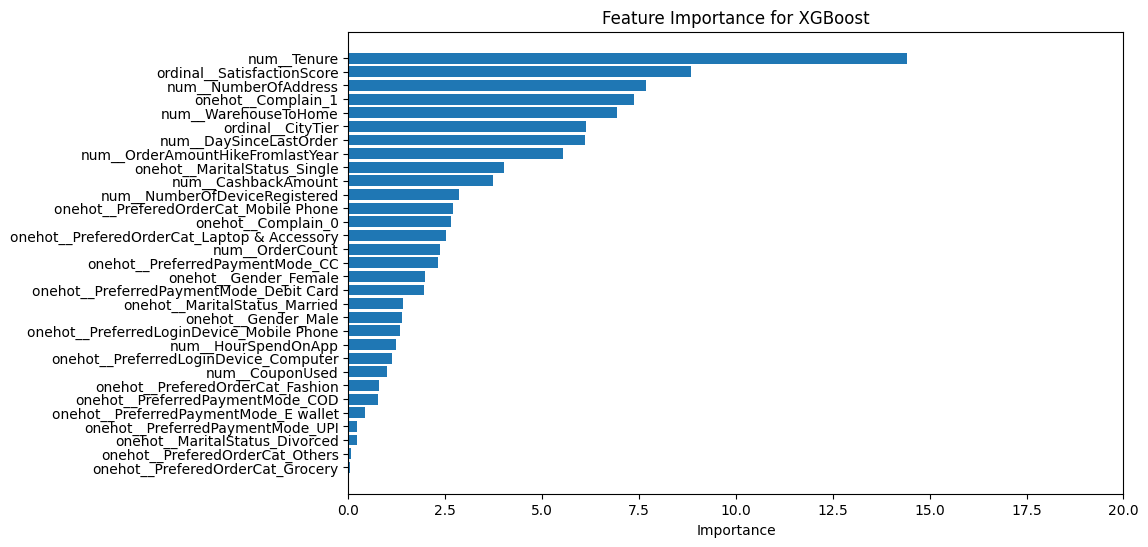

In [108]:
# Transformasi X_train menggunakan preprocessor untuk mendapatkan nama fitur yang benar
preprocessor = best_pipeline.named_steps['preprocessor']
X_train_transformed = preprocessor.transform(X_train)
feature_names = preprocessor.get_feature_names_out()

# Ambil model XGBoost dari pipeline
xgboost_classifier = best_pipeline.named_steps['classifier']

# Pastikan model XGBoost memiliki atribut 'feature_importances_'
if hasattr(xgboost_classifier, 'feature_importances_'):
    importances = xgboost_classifier.feature_importances_

    # Buat DataFrame dengan nama fitur dan importance-nya
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.xlim(0, 20)  # Sesuaikan rentang x-axis sesuai dengan yang diinginkan
    plt.title('Feature Importance for XGBoost')
    plt.gca().invert_yaxis()  # Balikkan y-axis agar urutannya menurun
    plt.show()
else:
    print("The model XGBoost does not support feature importances.")

`PENJELASAN`

Berdasarkan grafik feature importance, diketahui 5 fitur penting bagi model untuk dapat memprediksi churn yaitu:
- `num_Tenure`: Fitur ini menunjukkan lamanya pelanggan sudah menjadi pengguna dari layanan atau platform e-commerce. Semakin tinggi nilainya, biasanya menunjukkan loyalitas yang lebih tinggi. Tenure yang rendah bisa menjadi indikator bahwa pelanggan baru lebih rentan untuk churn jika mereka belum menemukan nilai yang cukup di platform tersebut.
- `ordinal_SatisfactionScore`: Fitur ini adalah skor kepuasan ordinal yang menggambarkan seberapa puas pelanggan terhadap layanan atau produk. Dalam data ini, justru pelanggan dengan skor kepuasan tinggi cenderung lebih berisiko untuk churn. Hal ini bisa mengindikasikan adanya ekspektasi yang lebih tinggi dari pelanggan yang puas atau potensi persaingan dari platform lain.
- `num_NumberOfAddress`: Fitur ini menunjukkan jumlah alamat yang didaftarkan oleh pelanggan. Dalam kasus ini, pelanggan dengan lebih banyak alamat terdaftar justru cenderung lebih berisiko untuk churn. Hal ini mungkin menunjukkan ketidakstabilan atau keinginan untuk mencoba layanan lain.
- `onehot_Complain_1`: Fitur kedua terpenting menunjukkan ada atau tidaknya keluhan dari pelanggan. Posisinya yang tinggi mengindikasikan bahwa keluhan pelanggan sangat berpengaruh terhadap kemungkinan churn.
- `num_WarehouseToHome`: Fitur ini menggambarkan jarak pengiriman dari gudang ke rumah pelanggan. Semakin jauh jarak pengiriman, semakin tinggi kemungkinan pelanggan untuk churn. Jarak yang lebih jauh dapat menyebabkan waktu pengiriman yang lebih lama, yang mungkin mengurangi kepuasan pelanggan terhadap layanan.

Berdasarkan fitur-fitur tersebut, perusahaan dapat menerapkan strategi berikut untuk mengurangi churn:

- `Tenure`: Buat program onboarding untuk pelanggan baru, seperti diskon awal atau panduan produk. Program ini akan membantu mereka lebih cepat memahami nilai platform dan meningkatkan keterikatan di awal perjalanan.
- `Satisfaction Score`: Berikan penawaran eksklusif untuk pelanggan dengan skor kepuasan tinggi agar mereka tetap terlibat. Ini dapat menjaga loyalitas mereka dan mengurangi kemungkinan mereka berpindah ke pesaing.
- `Number of Address`: Tawarkan promo atau insentif bagi pelanggan dengan banyak alamat untuk mendorong transaksi lebih lanjut. Ini bisa memperkuat hubungan mereka dengan platform dan menambah kenyamanan dalam bertransaksi.
- `Complain`: Perusahaan perlu membangun sistem penanganan keluhan yang efektif dengan respons cepat untuk setiap masalah yang dilaporkan. Hal ini dapat didukung dengan pembentukan tim khusus yang fokus menangani dan memantau pelanggan yang pernah menyampaikan komplain. Dengan pendekatan yang proaktif ini, perusahaan dapat meningkatkan kepuasan pelanggan dan mencegah mereka beralih ke kompetitor.
- `Warehouse to Home Distance`: Tingkatkan opsi pengiriman (seperti gratis atau cepat) untuk pelanggan yang jauh dari gudang. Ini dapat meningkatkan kepuasan mereka terhadap layanan pengiriman yang efisien, meskipun jarak pengiriman jauh.

>> #### 5.2.4. SHAP

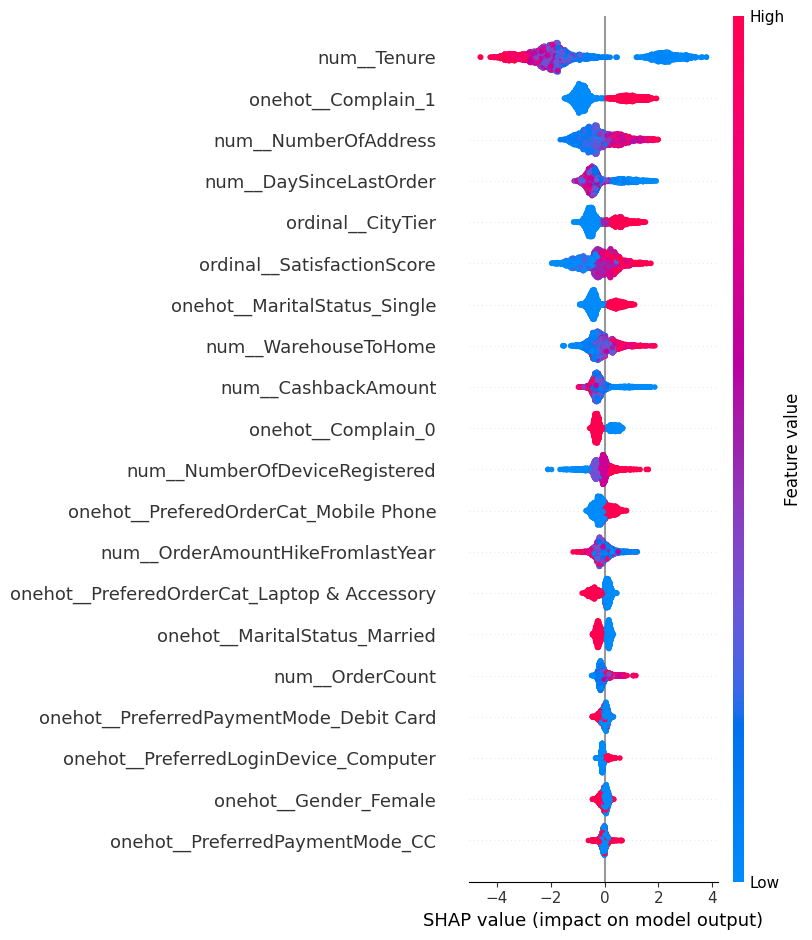

In [111]:
# Transformasi X_train menggunakan preprocessor untuk mendapatkan nilai fitur yang benar untuk SHAP
preprocessor = best_pipeline.named_steps['preprocessor']
X_train_transformed = preprocessor.transform(X_train)
feature_names = preprocessor.get_feature_names_out()

# Ambil model XGBoost dari pipeline
xgboost_classifier = best_pipeline.named_steps['classifier']

# Inisialisasi SHAP TreeExplainer untuk model XGBoost
explainer = shap.TreeExplainer(xgboost_classifier)

# Hitung SHAP values
shap_values = explainer.shap_values(X_train_transformed)

# Plot SHAP summary plot
plt.figure(figsize=(10, 6))
if isinstance(shap_values, list):  # Untuk model multiclass
    shap.summary_plot(shap_values[1], X_train_transformed, feature_names=feature_names)
else:
    shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

`PENJELASAN`

Berdasarkan grafik SHAP feature importance di atas, lima fitur teratas yang paling signifikan dalam mempengaruhi model prediksi churn adalah:

- `num_Tenure`: Fitur ini menunjukkan lamanya pelanggan sudah menjadi pengguna dari layanan atau platform e-commerce. Semakin tinggi nilainya, biasanya menunjukkan loyalitas yang lebih tinggi dan mengurangi risiko churn. Sebaliknya, tenure rendah dapat menjadi indikator bahwa pelanggan baru lebih rentan untuk churn jika mereka belum menemukan nilai yang cukup di platform.
- `onehot_Complain_1`: Fitur ini menunjukkan apakah pelanggan pernah mengajukan keluhan atau tidak. Pelanggan dengan riwayat keluhan menunjukkan kecenderungan lebih tinggi untuk churn, dapat sisebabkan karena mereka merasa tidak puas dengan solusi atau layanan yang diberikan.
- `num_NumberOfAddress`: Fitur ini menunjukkan jumlah alamat yang didaftarkan oleh pelanggan. Dalam data ini, pelanggan dengan lebih banyak alamat justru menunjukkan kecenderungan yang lebih tinggi untuk churn. Hal ini bisa mengindikasikan bahwa pelanggan yang sering berpindah alamat atau memiliki banyak lokasi mungkin kurang loyal atau lebih mudah beralih ke platform lain.
- `num_DaySinceLastOrder`:  Fitur ini mencatat jumlah hari sejak pesanan terakhir pelanggan. Semakin rendah nilai fitur ini (baru saja melakukan pesanan), semakin tinggi risiko churn. Sebaliknya, semakin tinggi nilai fitur ini (lama sejak pesanan terakhir), risiko churn cenderung rendah.
- `ordinal__CityTier`: Fitur ini mengklasifikasikan wilayah pelanggan berdasarkan tier (tingkatan kota). Pola SHAP menunjukkan bahwa pelanggan di wilayah tertentu mungkin memiliki risiko churn yang lebih tinggi.

Berdasarkan fitur-fitur yang paling signifikan ini, perusahaan dapat menerapkan strategi berikut untuk mengurangi churn:

- `Tenure`: Buat program onboarding untuk pelanggan baru, seperti diskon awal atau panduan produk. Program ini akan membantu mereka merasa lebih terhubung dengan platform sejak awal dan meningkatkan keterikatan di awal perjalanan mereka.
- `Complain`: Tingkatkan respons layanan pelanggan dan berikan solusi cepat untuk setiap keluhan. Tawarkan kompensasi seperti diskon atau cashback untuk pelanggan dengan keluhan berulang agar mereka merasa dihargai dan lebih puas dengan layanan yang diberikan.
- `Number of Address`: Tawarkan promo atau insentif bagi pelanggan dengan banyak alamat untuk mendorong mereka tetap setia pada platform. Ini bisa memperkuat hubungan mereka dan memberikan keuntungan yang relevan sesuai kebutuhan mereka di berbagai lokasi.
- `Day Since Last Order`:  Terapkan kampanye retargeting untuk pelanggan yang sudah lama tidak berbelanja, seperti email reminder atau diskon khusus untuk menarik mereka kembali bertransaksi.
- `City Tier`: Kembangkan kampanye lokal yang relevan dengan wilayah pelanggan, misalnya diskon khusus untuk pelanggan di kota tertentu atau layanan pengiriman gratis di wilayah mereka..

In [113]:
# Menampilkan classification report untuk XGBoost
if 'XGBoost' in models:
    print("\nClassification Report for XGBoost:")
    
    # Prediksi label untuk X_test
    y_test_pred = best_pipeline.predict(X_test)
    
    # Menampilkan classification report
    print(classification_report(y_test, y_test_pred))



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       691
           1       0.91      0.89      0.90       141

    accuracy                           0.97       832
   macro avg       0.94      0.93      0.94       832
weighted avg       0.97      0.97      0.97       832



>> #### 5.2.5. CONFUSION MATRIX

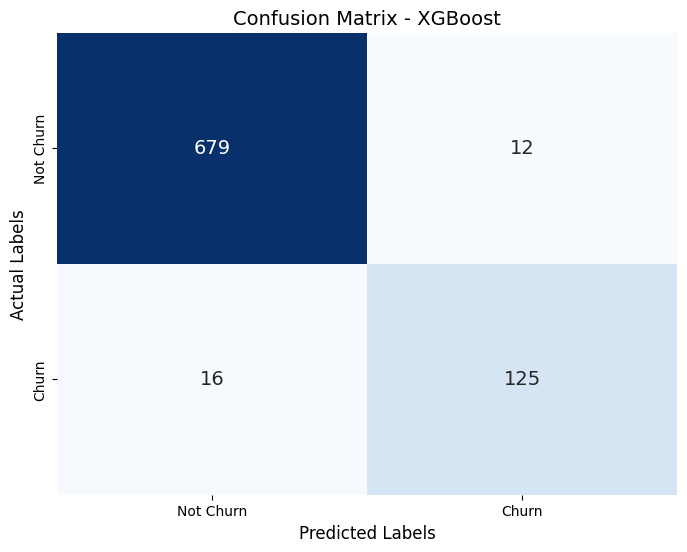

In [115]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'],
            annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix - XGBoost', fontsize=14)
plt.show()

>> #### 5.2.6. ROC CURVE

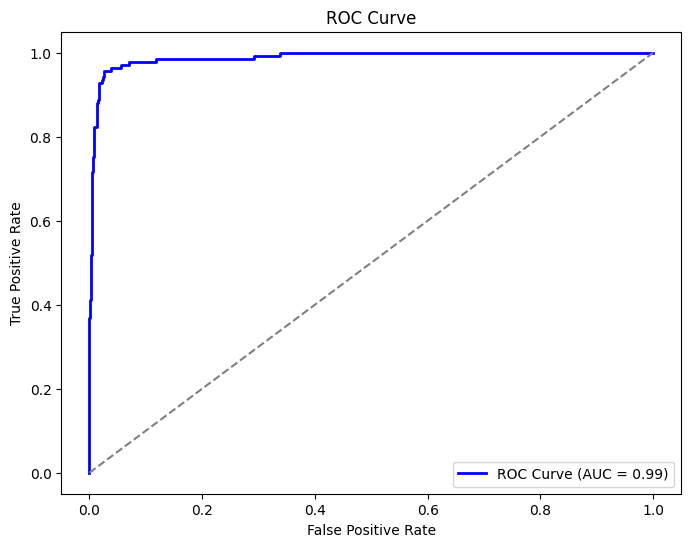

In [117]:
# Menghitung probabilitas prediksi untuk kelas positif
y_test_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

# Menghitung nilai fpr, tpr, dan threshold untuk ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal sebagai baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

>> #### 5.2.7. PRECISION-RECALL CURVE

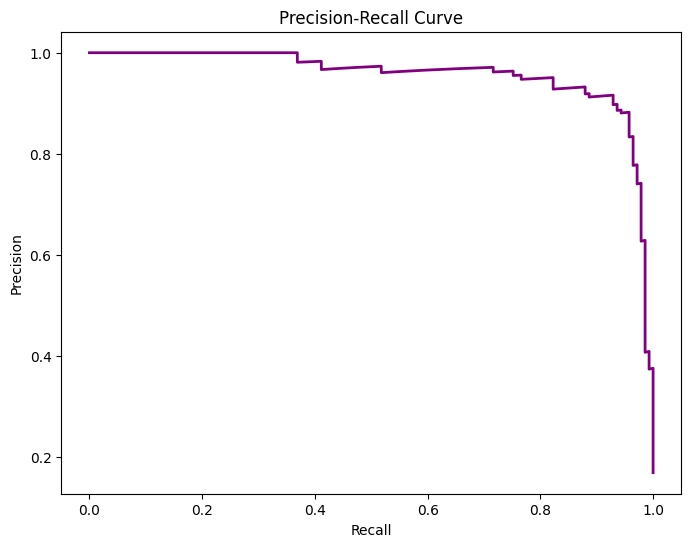

In [119]:
# Menghitung precision dan recall pada berbagai threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

`PENJELASAN`

`1. Kurva PR`:
* Kurva menunjukkan performa yang sangat baik dengan precision yang sangat tinggi (hampir 1.0) dan konsisten hingga recall sekitar 0.8
* Kurva membentuk garis yang hampir horizontal dari recall 0 hingga 0.8, menunjukkan stabilitas model yang sangat baik
* Terjadi penurunan yang signifikan pada precision ketika recall melebihi 0.8, yang ditunjukkan dengan kurva yang menurun tajam

`2. Analisis Detail`:
* Bagian Stabil (Recall 0-0.8):
    * Precision konsisten di sekitar 1.0
    * Menunjukkan hampir tidak ada false positives
    * Model sangat akurat dalam memprediksi churn
* Bagian Penurunan (Recall >0.8):
    * Precision mulai menurun secara drastis
    * Penurunan tajam terjadi terutama setelah recall 0.9
    * Pada recall mendekati 1.0, precision turun hingga sekitar 0.2

Kurva ini menunjukkan model memiliki performa yang sangat baik dalam prediksi churn customer, terutama pada range recall 0-0.8, yang merupakan area operasi yang ideal untuk implementasi praktis.

>> #### 5.2.8. LEARNING CURVE

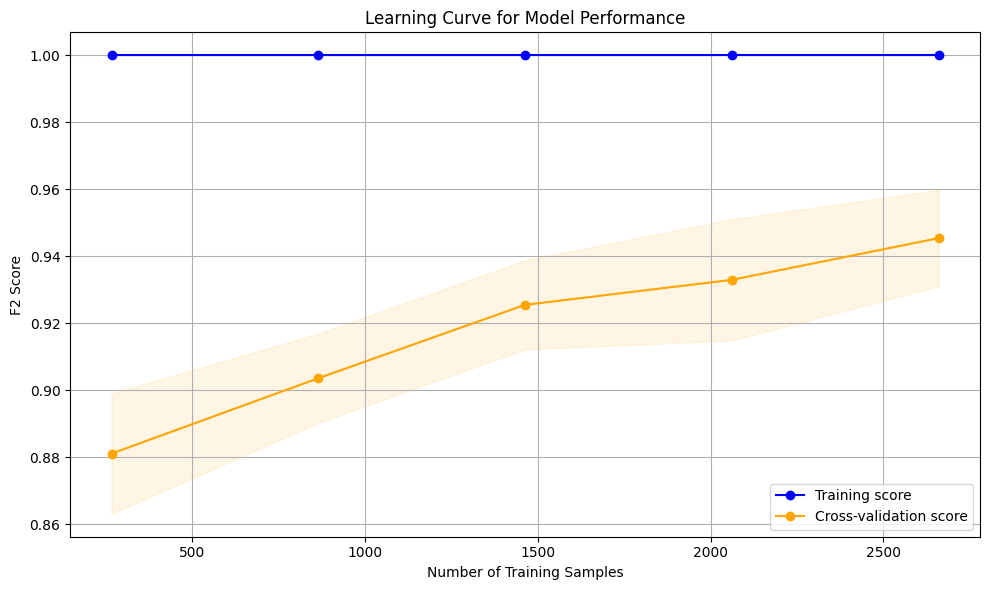

In [122]:
# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_pipeline, 
    X=X_train, 
    y=y_train, 
    cv=5, 
    scoring=f2_scorer, 
    n_jobs=-1
)

# Fungsi pembantu untuk menghitung rata-rata dan deviasi standar
def mean_std(scores):
    return scores.mean(axis=1), scores.std(axis=1)

# Menghitung rata-rata dan deviasi standar
train_scores_mean, train_scores_std = mean_std(train_scores)
test_scores_mean, test_scores_std = mean_std(test_scores)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="orange", alpha=0.1)

# Mengatur label dan judul
plt.xlabel("Number of Training Samples")
plt.ylabel("F2 Score")
plt.title("Learning Curve for Model Performance")
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

`PENJELASAN`

`1. Training score`:
* Kurva biru (training score) konsisten menunjukkan skor sempurna (1.0) untuk semua jumlah sampel
* Garis lurus horizontal pada nilai 1.0 mengindikasikan model mencapai performa sempurna pada data training
* Hal ini memang menunjukkan tanda-tanda overfitting karena model terlalu baik dalam mempelajari data training

`2. Validation score`:
* Kurva oranye menunjukkan peningkatan gradual dari sekitar 0.88 (500 sampel) hingga 0.95 (2500 sampel)
* Area bayangan oranye menunjukkan confidence interval yang semakin menyempit seiring bertambahnya data
* Meski ada overfitting pada data training, validation score yang tinggi (0.95) menunjukkan model masih memiliki performa yang baik

`REKOMENDASI UNTUK MODEL SELANJUTNYA`

`1. Hyperparameter Tuning`: Mengurangi overfitting dengan mencoba kombinasi hyperparameter tuning pada model, seperti mengatur max_depth, min_child_weight, atau subsample, untuk mengurangi kompleksitas model dan membuatnya lebih generalis.

`2. Penambahan Data Training`: Mengingat skor validasi terus meningkat seiring bertambahnya data, mengumpulkan lebih banyak data training mungkin akan lebih menguntungkan dan membantu meningkatkan performa model.

`3. Teknik Cross-Validation yang Lebih Kompleks`: Menggunakan teknik cross-validation yang lebih komprehensif, seperti stratified k-fold, dapat memberikan gambaran yang lebih menyeluruh tentang kemampuan generalisasi model pada berbagai subset data, sehingga membantu mengurangi risiko overfitting.

> ## 5.3. SAVE MODEL

In [125]:
import pickle

# Menggabungkan keseluruhan data
X_final = pd.concat([X_train, X_test], axis=0)
y_final = pd.concat([y_train, y_test], axis=0)

if 'XGBoost' in models:
    # Mengambil model XGBoost terbaik dari hasil GridSearchCV
    xgboost_best_pipeline = gscv.best_estimator_

    # Fit model XGBoost pipeline ke keseluruhan dataset
    xgboost_best_pipeline.fit(X_final, y_final)

    # Save model menggunakan pickle
    with open('best_xgboost_model.pkl', 'wb') as model_file:
        pickle.dump(xgboost_best_pipeline, model_file)

    print("Best XGBoost model berhasil disave!")

Best XGBoost model berhasil disave!


> ## 5.4. MODEL CONSTRAINT

`PENJELASAN`

Perlu diketahui bahwa terdapat batasan-batasan dari model yang merupakan limitasi rentang value, dimana ketika model memprediksi fitur dan value yang berada di dalam rentang optimalnya, maka hasil yang didapatkan akan maksimal, begitu pun sebaliknya. Berikut adalah detail batasan limitasi model berdasarkan value dari masing-masing fitur:

| Feature Name                | Allowed Range/Values                | Additional Info                                |
|-----------------------------|-------------------------------------|------------------------------------------------|
| Tenure                      | 0 - 61                              | Lama waktu keanggotaan pelanggan di e-commerce |
| PreferredLoginDevice        | Mobile Phone, Computer              | Perangkat login yang disukai oleh pelanggan    |
| CityTier                    | 1, 2, 3                             | Tingkat kota                                   |
| WarehouseToHome             | 5 - 39                             | Jarak antara gudang dan rumah pelanggan        |
| PreferredPaymentMode        | Debit Card, Credit Card, E-wallet, COD, Bank Transfer | Metode pembayaran yang disukai oleh pelanggan |
| Gender                      | Male, Female                        | Jenis kelamin pelanggan                        |
| HourSpendOnApp              | 0 - 5                               | Jumlah jam yang dihabiskan di aplikasi mobile atau situs web |
| NumberOfDeviceRegistered    | 1 - 6                               | Total jumlah perangkat yang terdaftar untuk pelanggan tertentu |
| PreferedOrderCat            | Laptop & Accessory, Mobile, Fashion, Home Decor, Food | Kategori pesanan yang disukai oleh pelanggan dalam sebulan terakhir |
| SatisfactionScore           | 1 - 5                               | Skor kepuasan pelanggan terhadap layanan       |
| MaritalStatus               | Single, Married, Divorced           | Status pernikahan pelanggan                    |
| NumberOfAddress             | 1 - 12                              | Total jumlah alamat yang ditambahkan oleh pelanggan |
| Complain                    | 0, 1                                | Keluhan yang diajukan dalam sebulan terakhir   |
| OrderAmountHikeFromlastYear | 11 - 26                             | Persentase peningkatan jumlah pesanan dari tahun lalu |
| CouponUsed                  | 0 - 16                              | Total jumlah kupon yang digunakan dalam sebulan terakhir |
| OrderCount                  | 1 - 16                              | Total jumlah pesanan yang dilakukan dalam sebulan terakhir |
| DaySinceLastOrder           | 0 - 46                              | Hari sejak pesanan terakhir oleh pelanggan     |
| CashbackAmount              | 0.00 - 324.99                       | Rata-rata cashback dalam sebulan terakhir      |

Catatan
- Model akan bekerja dengan maksimal apabila dataset yang digunakan telah bersih dari missing value dan data duplikat
- Dalam konteks analisa ini, model bekerja dengan kontribusi kolom hasil encoding.

# 6. RULE BASED MODEL

> ## 6.1. EXPLANATION

Berdasarkan analisa yang dilakukan oleh University of Warsaw tahun 2022,  Kamil Matuszela'nski dan Katarzyna Kopczewska menyimpulkan bahwa, terdapat 5 faktor utama yang paling berpengaruh terhadap potensi churn pelanggan pada bisnis e-commerce. Kelima faktor ini kemudian digunakan oleh tim data sebagai dasar untuk `memperdiksi pelanggan churn tanpa menggunakan model machine learning atau *rule-based model*` dengan tujuan membandingkan akurasi dari prediksi dengan dan tanpa menggunakan machine learning, sehingga didapat metode prediksi yang paling tepat.

Berikut `5 faktor utama yang paling berpengaruh terhadap potensi churn` pelanggan pada bisnis e-commerce serta fitur yang dijadikan representatif untuk membuat *rule-based model*:
1. `Nilai pembayaran untuk pesanan pertama`
- `OrderAmountHikeFromlastYear`: Bisa digunakan untuk menunjukkan perubahan nilai pembayaran, meskipun ini mencerminkan peningkatan dari tahun sebelumnya, dapat memberi indikasi nilai pesanan awal.
- `CashbackAmount`: Nilai rata-rata cashback yang diberikan mungkin mengandung pesanan pertama sebagai insentif, sehingga bisa menunjukkan nilai transaksi pertama.
2. `Jumlah item yang dibeli dan biaya pengiriman`
- `OrderCount`: Mewakili jumlah pesanan yang dilakukan, yang dapat berkaitan dengan jumlah item yang dibeli.
- `WarehouseToHome`: Jarak atau biaya pengiriman dari gudang ke rumah pelanggan dapat digunakan sebagai indikator biaya pengiriman.
3. `Kategori produk yang dibeli`
- `PreferredOrderCat`: Fitur ini langsung menunjukkan kategori produk yang disukai pelanggan, yang dapat merepresentasikan kategori produk yang dibeli.
4. `Lingkungan demografis pelanggan`
- `Gender`: Jenis kelamin pelanggan adalah salah satu elemen penting dari lingkungan demografis.
- `MaritalStatus`: Status pernikahan juga merupakan faktor demografis yang relevan dan dapat menggambarkan preferensi dan kebutuhan pelanggan.
5. `Lokasi pelanggan`
- `CityTier`: Menunjukkan tingkat kota atau wilayah pelanggan, yang dapat membantu memahami lokasi geografis mereka dalam konteks perkotaan atau pedesaan.

Fitur-fitur tersebut kemudian diberikan pembobotan dengan besar bobot sesuai dengan tingkatan di atas. Kemudian akan dilakukan kalkulasi untuk mendapatkan `ChurnScore` yang nantinya akan digunakan untuk menentukan pelanggan yang berpotensi churn dan serta sebagai label `Churn_RB` (Label churn berdasarkan Rule-Based Model). Adapun perhitungan yang digunakan dalam analisa ini yaitu sebagai berikut:

$$ % Churn Score
\text{Churn Score} = \sum \text{Weight2} $$

$$ % Weight2
\text{Weight2} = \text{Weight1} \times 100 \times \text{bobot fitur} $$

$$ % Weight1
\text{Weight1} = \text{bobot kategori dari masing-masing fitur berdasarkan tingkat churn-rate} $$

> ## 6.2. DATA TEST CLEANING

In [132]:
# Periksa kembali missing value
missing_data = pd.DataFrame(data = df_test.isna().sum(), columns = ['Missing Values'])
missing_data['Percentage'] = round((df_test.isna().sum()/len(df_test))*100,2)
missing_data

# Melakukan imputasi missing value dengan median
for column in df_test.select_dtypes(include=np.number):
  df_test[column].fillna(df_test[column].median(), inplace=True)

/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/977331645.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].fillna(df_test[column].median(), inplace=True)


In [133]:
# Melihat jumlah data yang duplikat dan tidak duplikat
print(f'''Sebelum dilakukan penanganan data duplikat:
{df_test.duplicated().value_counts()}''')

# Membuang data duplicate
df_test.drop_duplicates(subset=df_test.columns, keep='first', inplace= True)

# Memastikan data duplikat telah dihapus
print(f'''
Setelah dilakukan penanganan data duplikat:
{df_test.duplicated().value_counts()}''')

Sebelum dilakukan penanganan data duplikat:
False    1126
Name: count, dtype: int64

Setelah dilakukan penanganan data duplikat:
False    1126
Name: count, dtype: int64


In [134]:
# Membuat fungsi untuk menghapus outlier
def drop_outliers(df):
  #df = df[(df['Tenure'] >= 2.0) & (df['Tenure'] <= 21.0)]
  df = df[(df['WarehouseToHome']>=0) & (df['WarehouseToHome']<= 39)]
  df = df[(df['NumberOfAddress'] >=0) & (df['NumberOfAddress'])<= 12]
  return df

# Menerapkan fungsi pada dataset
df = drop_outliers(df_test)

> ## 6.3. RULE-BASED MODELING ON DATA TEST

In [136]:
# Definisikan level deskriptif
level_deskriptif = [
    'Nilai pembayaran untuk pesanan pertama',
    'Jumlah item yang dibeli dan biaya pengiriman',
    'Kategori produk yang dibeli',
    'Lingkungan demografis pelanggan',
    'Lokasi pelanggan'
]

# Definisikan basis untuk pembobotan eksponensial
basis = 2

# Hitung total pembagi untuk menormalkan bobot agar jumlahnya menjadi 1
total_pembagi = sum([basis ** (len(level_deskriptif) - i - 1) for i in range(len(level_deskriptif))])

# Hitung bobot untuk setiap level deskriptif
bobot_deskriptif = [(basis ** (len(level_deskriptif) - i - 1)) / total_pembagi for i in range(len(level_deskriptif))]

# Buat DataFrame untuk output
df_bobot_deskriptif = pd.DataFrame({
    'Deskripsi Level': level_deskriptif,
    'Bobot': bobot_deskriptif
})

# Tampilkan DataFrame
df_bobot_deskriptif

Deskripsi Level     Bobot
0        Nilai pembayaran untuk pesanan pertama  0.516129
1  Jumlah item yang dibeli dan biaya pengiriman  0.258065
2                   Kategori produk yang dibeli  0.129032
3               Lingkungan demografis pelanggan  0.064516
4                              Lokasi pelanggan  0.032258

`PENJELASAN`

Didapat hasil pembobotan seperti pada tabel di atas, itu berarti masing-masing fitur mendapatkan `bobot fitur` sebagai berikut:

- `OrderAmountHikeFromLastYear` dan `CashbackAmount`: 0.516129
- `OrderCount` dan `WarehouseToHome`: 0.258065
- `PreferedOrderCat`: 0.129032
- `Gender` dan `MaritalStatus`: 0.064516
- `CityTier`: 0.032258

In [138]:
# Membuat kolopok untuk value pada kolom numerik

# Membuat kelompok menggunakan pd.cut
df_test['Tenure_Binned'] = pd.cut(df_test['Tenure'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['<=5', '>5-10', '>10-15', '>15-20', '>20'] , include_lowest = True) #include lowest = batas bawah dari
df_test['CashbackAmount_Binned'] = pd.cut(df_test['CashbackAmount'], bins=[0, 150, 200, 250, 300, float('inf')], labels=['<=150', '>150-200', '>200-250', '>250-300', '>300'], include_lowest = True)
df_test['WarehouseToHome_Binned'] = pd.cut(df_test['WarehouseToHome'], bins=[0, 10, 15, 20, float('inf')], labels=['<=10', '>10-15', '>15-20', '>20'], include_lowest = True)

# Membuat kelompok menggunakan pd.qcut
df_test['NumberOfAddress_Binned'] = pd.qcut(df_test['NumberOfAddress'], q=5, duplicates = 'drop', labels=['1-2', '2-3', '3-4', '4-6', '>6'])
df_test['OrderAmountHikeFromlastYear_Binned'] = pd.qcut(df_test['OrderAmountHikeFromlastYear'], q=5, duplicates = 'drop', labels = ['10-12', '>12-14', '>14-16', '>16-19', '>19'])
df_test['CouponUsed_Binned'] = pd.qcut(df_test['CouponUsed'], q=5, duplicates='drop', labels = ['0-1','>1-2', '>2'])
df_test['OrderCount_Binned'] = pd.qcut(df_test['OrderCount'], q=5, duplicates='drop', labels = ['1-2', '>2-4', '>4'])
df_test['DaySinceLastOrder_Binned'] = pd.qcut(df_test['DaySinceLastOrder'], q=5, labels = ['0-1', '>1-3', '>3-4', '>4-8', '>8'])

In [139]:
# Kamus untuk menyimpan bobot dan rata-rata churn untuk setiap fitur
bobot_kategori = {}

# Loop melalui kolom yang relevan untuk menghitung rata-rata churn dan bobot
for kolom in ['OrderAmountHikeFromlastYear_Binned', 'CashbackAmount_Binned', 'OrderCount_Binned',
              'WarehouseToHome_Binned', 'PreferedOrderCat', 'Gender', 'MaritalStatus', 'CityTier']:

    # Hitung rata-rata churn untuk setiap kategori dalam kolom dan urutkan secara menurun
    rata_rata_churn = df_test.groupby(kolom)['Churn'].mean().sort_values(ascending=False)

    # Hitung total nilai rata-rata churn untuk normalisasi
    total_rata_rata_churn = rata_rata_churn.sum()

    # Hitung bobot untuk setiap kategori sebagai proporsi dari rata-rata churn terhadap total rata-rata churn
    bobot = rata_rata_churn / total_rata_rata_churn

    # Buat DataFrame yang mencakup rata-rata churn dan bobot
    bobot_kategori[kolom] = pd.DataFrame({
        kolom: rata_rata_churn.index,
        'Rata-rata Churn': rata_rata_churn.values,
        'Bobot': bobot.values
    })

# Tampilkan setiap tabel bobot dan rata-rata churn dalam format yang rapi
for fitur, df_bobot in bobot_kategori.items():
    display(df_bobot.style.set_caption(f"Rata-rata Churn dan Bobot untuk kategori di '{fitur}'"))

/var/folders/gn/wl0ypjp12hn9vwp9j6vjw2g40000gn/T/ipykernel_39120/3120617870.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_rata_churn = df_test.groupby(kolom)['Churn'].mean().sort_values(ascending=False)


`PENJELASAN`

Berdasarkan tabel tersebut, dapat diketahui `bobot kategori` atau disebut sebagai `Weight1`

In [141]:
# Kamus untuk menyimpan bobot berdasarkan data yang diberikan oleh pengguna
bobot = {
    'OrderAmountHikeFromlastYear_Binned': {
        '10-12': 0.239798, '>19': 0.202457, '>16-19': 0.189551, '>12-14': 0.187731, '>14-16': 0.180463
    },
    'CashbackAmount_Binned': {
        '<=150': 0.398657, '>200-250': 0.223489, '>150-200': 0.213573, '>300': 0.098463, '>250-300': 0.065816
    },
    'OrderCount_Binned': {
        '1-2': 0.372082, '>2-4': 0.322641, '>4': 0.305278
    },
    'WarehouseToHome_Binned': {
        '>20': 0.298130, '>15-20': 0.272939, '>10-15': 0.221486, '<=10': 0.207445
    },
    'PreferedOrderCat': {
        'Mobile Phone': 0.422523, 'Fashion': 0.231307, 'Laptop & Accessory': 0.165188, 'Others': 0.107694, 'Grocery': 0.073288
    },
    'Gender': {
        'Male': 0.540994, 'Female': 0.459006
    },
    'MaritalStatus': {
        'Single': 0.520733, 'Divorced': 0.268772, 'Married': 0.210496
    },
    'CityTier': {
        3: 0.418971, 2: 0.309195, 1: 0.271834
    }
}

# Fungsi untuk mengelompokkan dan menetapkan bobot
def tetapkan_bobot(baris, nama_kolom, kategori):
    for nama_kategori, bobot in kategori.items():
        if nama_kolom == 'OrderAmountHikeFromlastYear_Binned':
            if nama_kategori == '10-12' and 10 <= baris['OrderAmountHikeFromlastYear'] < 12:
                return bobot
            elif nama_kategori == '>19' and baris['OrderAmountHikeFromlastYear'] > 19:
                return bobot
            elif nama_kategori == '>16-19' and 16 < baris['OrderAmountHikeFromlastYear'] <= 19:
                return bobot
            elif nama_kategori == '>12-14' and 12 < baris['OrderAmountHikeFromlastYear'] <= 14:
                return bobot
            elif nama_kategori == '>14-16' and 14 < baris['OrderAmountHikeFromlastYear'] <= 16:
                return bobot
        elif nama_kolom == 'CashbackAmount_Binned':
            if nama_kategori == '<=150' and baris['CashbackAmount'] <= 150:
                return bobot
            elif nama_kategori == '>200-250' and 200 < baris['CashbackAmount'] <= 250:
                return bobot
            elif nama_kategori == '>150-200' and 150 < baris['CashbackAmount'] <= 200:
                return bobot
            elif nama_kategori == '>300' and baris['CashbackAmount'] > 300:
                return bobot
            elif nama_kategori == '>250-300' and 250 < baris['CashbackAmount'] <= 300:
                return bobot
        elif nama_kolom == 'OrderCount_Binned':
            if nama_kategori == '1-2' and 1 <= baris['OrderCount'] <= 2:
                return bobot
            elif nama_kategori == '>2-4' and 2 < baris['OrderCount'] <= 4:
                return bobot
            elif nama_kategori == '>4' and baris['OrderCount'] > 4:
                return bobot
        elif nama_kolom == 'WarehouseToHome_Binned':
            if nama_kategori == '>20' and baris['WarehouseToHome'] > 20:
                return bobot
            elif nama_kategori == '>15-20' and 15 < baris['WarehouseToHome'] <= 20:
                return bobot
            elif nama_kategori == '>10-15' and 10 < baris['WarehouseToHome'] <= 15:
                return bobot
            elif nama_kategori == '<=10' and baris['WarehouseToHome'] <= 10:
                return bobot
        elif nama_kolom in ['PreferedOrderCat', 'Gender', 'MaritalStatus', 'CityTier']:
            return kategori.get(baris[nama_kolom], 0)

# Terapkan bobot ke setiap kolom dan simpan di kolom baru, mempertahankan kolom _Binned asli
df_test['OrderAmountHikeWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'OrderAmountHikeFromlastYear_Binned', bobot['OrderAmountHikeFromlastYear_Binned']), axis=1)
df_test['CashbackAmountWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'CashbackAmount_Binned', bobot['CashbackAmount_Binned']), axis=1)
df_test['OrderCountWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'OrderCount_Binned', bobot['OrderCount_Binned']), axis=1)
df_test['WarehouseToHomeWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'WarehouseToHome_Binned', bobot['WarehouseToHome_Binned']), axis=1)
df_test['PreferedOrderCatWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'PreferedOrderCat', bobot['PreferedOrderCat']), axis=1)
df_test['GenderWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'Gender', bobot['Gender']), axis=1)
df_test['MaritalStatusWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'MaritalStatus', bobot['MaritalStatus']), axis=1)
df_test['CityTierWeight_1'] = df_test.apply(lambda x: tetapkan_bobot(x, 'CityTier', bobot['CityTier']), axis=1)

# Tampilkan DataFrame yang sudah diperbarui
df_test

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
3504       53505      0    14.0         Mobile Phone         1   
1046       51047      1     9.0                Phone         1   
4165       54166      0     6.0             Computer         1   
4192       54193      0     4.0                Phone         1   
248        50249      0     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
4764       54765      0    16.0         Mobile Phone         1   
3767       53768      1     1.0                Phone         1   
1645       51646      0    14.0         Mobile Phone         3   
4964       54965      0    22.0             Computer         1   
4559       54560      0     5.0                Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
3504             21.0          Credit Card   Male             3.0   
1046             13.0           Debit Card   Male             3.0   
4165              9.0           Debit Card   Male             4.0   
4192             16.0          Credit Card   Male             3.0   
248               6.0          Credit Card   Male             2.0   
...               ...                  ...    ...             ...   
4764             36.0           Debit Card   Male             4.0   
3767              7.0                  COD   Male             4.0   
1645              8.0           Debit Card   Male             2.0   
4964              7.0          Credit Card   Male             3.0   
4559              7.0           Debit Card   Male             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
3504                         5              Others                  3   
1046                         3              Mobile                  5   
4165                         4        Mobile Phone                  1   
4192                         5        Mobile Phone                  3   
248                          3        Mobile Phone                  4   
...                        ...                 ...                ...   
4764                         4  Laptop & Accessory                  4   
3767                         5        Mobile Phone                  5   
1645                         3             Grocery                  4   
4964                         2             Grocery                  1   
4559                         5        Mobile Phone                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
3504        Single                3         0                         15.0   
1046        Single                4         1                         14.0   
4165        Single                2         0                         14.0   
4192        Single                3         0                         14.0   
248        Married                2         0                         11.0   
...            ...              ...       ...                          ...   
4764       Married                3         0                         14.0   
3767        Single                8         0                         14.0   
1645        Single                2         0                         19.0   
4964        Single                4         0                         15.0   
4559       Married                3         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount Tenure_Binned  \
3504         5.0         5.0               10.0          321.26        >10-15   
1046         0.0         1.0                3.0          121.66         >5-10   
4165         2.0         4.0                7.0          155.68         >5-10   
4192         1.0         2.0                9.0          147.06           <=5   
248          0.0         1.0                4.0          138.16           <=5   
...          ...         ...                ...             ...           ...   
476

`PENJELASAN`

Dibuat fitur baru berisikan Weight1 dari masing-masing fitur untuk setiap pelanggan.

In [143]:
# Definisikan pengali untuk setiap atribut berdasarkan nilai yang diberikan oleh pengguna
pengali = {
    'OrderAmountHikeFromlastYear_Binned': 0.516129,
    'CashbackAmount_Binned': 0.516129,
    'OrderCount_Binned': 0.258065,
    'WarehouseToHome_Binned': 0.258065,
    'PreferedOrderCat': 0.129032,
    'Gender': 0.064516,
    'MaritalStatus': 0.064516,
    'CityTier': 0.032258
}

# Hitung Weight_2 dengan mengalikan Weight_1 dengan 100 dan kemudian dengan pengali yang ditentukan
df_test['OrderAmountHikeWeight_2'] = df_test['OrderAmountHikeWeight_1'] * 100 * pengali['OrderAmountHikeFromlastYear_Binned']
df_test['CashbackAmountWeight_2'] = df_test['CashbackAmountWeight_1'] * 100 * pengali['CashbackAmount_Binned']
df_test['OrderCountWeight_2'] = df_test['OrderCountWeight_1'] * 100 * pengali['OrderCount_Binned']
df_test['WarehouseToHomeWeight_2'] = df_test['WarehouseToHomeWeight_1'] * 100 * pengali['WarehouseToHome_Binned']
df_test['PreferedOrderCatWeight_2'] = df_test['PreferedOrderCatWeight_1'] * 100 * pengali['PreferedOrderCat']
df_test['GenderWeight_2'] = df_test['GenderWeight_1'] * 100 * pengali['Gender']
df_test['MaritalStatusWeight_2'] = df_test['MaritalStatusWeight_1'] * 100 * pengali['MaritalStatus']
df_test['CityTierWeight_2'] = df_test['CityTierWeight_1'] * 100 * pengali['CityTier']

# Tampilkan DataFrame yang sudah diperbarui
df_test

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
3504       53505      0    14.0         Mobile Phone         1   
1046       51047      1     9.0                Phone         1   
4165       54166      0     6.0             Computer         1   
4192       54193      0     4.0                Phone         1   
248        50249      0     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
4764       54765      0    16.0         Mobile Phone         1   
3767       53768      1     1.0                Phone         1   
1645       51646      0    14.0         Mobile Phone         3   
4964       54965      0    22.0             Computer         1   
4559       54560      0     5.0                Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
3504             21.0          Credit Card   Male             3.0   
1046             13.0           Debit Card   Male             3.0   
4165              9.0           Debit Card   Male             4.0   
4192             16.0          Credit Card   Male             3.0   
248               6.0          Credit Card   Male             2.0   
...               ...                  ...    ...             ...   
4764             36.0           Debit Card   Male             4.0   
3767              7.0                  COD   Male             4.0   
1645              8.0           Debit Card   Male             2.0   
4964              7.0          Credit Card   Male             3.0   
4559              7.0           Debit Card   Male             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
3504                         5              Others                  3   
1046                         3              Mobile                  5   
4165                         4        Mobile Phone                  1   
4192                         5        Mobile Phone                  3   
248                          3        Mobile Phone                  4   
...                        ...                 ...                ...   
4764                         4  Laptop & Accessory                  4   
3767                         5        Mobile Phone                  5   
1645                         3             Grocery                  4   
4964                         2             Grocery                  1   
4559                         5        Mobile Phone                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
3504        Single                3         0                         15.0   
1046        Single                4         1                         14.0   
4165        Single                2         0                         14.0   
4192        Single                3         0                         14.0   
248        Married                2         0                         11.0   
...            ...              ...       ...                          ...   
4764       Married                3         0                         14.0   
3767        Single                8         0                         14.0   
1645        Single                2         0                         19.0   
4964        Single                4         0                         15.0   
4559       Married                3         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount Tenure_Binned  \
3504         5.0         5.0               10.0          321.26        >10-15   
1046         0.0         1.0                3.0          121.66         >5-10   
4165         2.0         4.0                7.0          155.68         >5-10   
4192         1.0         2.0                9.0          147.06           <=5   
248          0.0         1.0                4.0          138.16           <=5   
...          ...         ...                ...             ...           ...   
476

`PENJELASAN`

Dibuat fitur baru yaitu Weight2 dari masing-masing pelanggan.

In [145]:
# Buat kolom baru 'ChurnScore' dengan menjumlahkan semua kolom Weight_2
df_test['ChurnScore'] = df_test[
    [
        'OrderAmountHikeWeight_2', 'CashbackAmountWeight_2', 'OrderCountWeight_2',
        'WarehouseToHomeWeight_2', 'PreferedOrderCatWeight_2', 'GenderWeight_2',
        'MaritalStatusWeight_2', 'CityTierWeight_2'
    ]
].sum(axis=1)

# Tampilkan DataFrame yang sudah diperbarui dengan kolom 'ChurnScore' yang baru
df_test

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
3504       53505      0    14.0         Mobile Phone         1   
1046       51047      1     9.0                Phone         1   
4165       54166      0     6.0             Computer         1   
4192       54193      0     4.0                Phone         1   
248        50249      0     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
4764       54765      0    16.0         Mobile Phone         1   
3767       53768      1     1.0                Phone         1   
1645       51646      0    14.0         Mobile Phone         3   
4964       54965      0    22.0             Computer         1   
4559       54560      0     5.0                Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
3504             21.0          Credit Card   Male             3.0   
1046             13.0           Debit Card   Male             3.0   
4165              9.0           Debit Card   Male             4.0   
4192             16.0          Credit Card   Male             3.0   
248               6.0          Credit Card   Male             2.0   
...               ...                  ...    ...             ...   
4764             36.0           Debit Card   Male             4.0   
3767              7.0                  COD   Male             4.0   
1645              8.0           Debit Card   Male             2.0   
4964              7.0          Credit Card   Male             3.0   
4559              7.0           Debit Card   Male             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
3504                         5              Others                  3   
1046                         3              Mobile                  5   
4165                         4        Mobile Phone                  1   
4192                         5        Mobile Phone                  3   
248                          3        Mobile Phone                  4   
...                        ...                 ...                ...   
4764                         4  Laptop & Accessory                  4   
3767                         5        Mobile Phone                  5   
1645                         3             Grocery                  4   
4964                         2             Grocery                  1   
4559                         5        Mobile Phone                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
3504        Single                3         0                         15.0   
1046        Single                4         1                         14.0   
4165        Single                2         0                         14.0   
4192        Single                3         0                         14.0   
248        Married                2         0                         11.0   
...            ...              ...       ...                          ...   
4764       Married                3         0                         14.0   
3767        Single                8         0                         14.0   
1645        Single                2         0                         19.0   
4964        Single                4         0                         15.0   
4559       Married                3         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount Tenure_Binned  \
3504         5.0         5.0               10.0          321.26        >10-15   
1046         0.0         1.0                3.0          121.66         >5-10   
4165         2.0         4.0                7.0          155.68         >5-10   
4192         1.0         2.0                9.0          147.06           <=5   
248          0.0         1.0                4.0          138.16           <=5   
...          ...         ...                ...             ...           ...   
476

`PENJELASAN`

Dilakukan perhitungan ChurnScore dari masing-masing pelanggan.

In [147]:
# Melihat pelanggan dengan ChurnScore tertinggi
df_test.sort_values(by='ChurnScore', ascending=False)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
4287       54288      1     1.0                Phone         3   
840        50841      0     0.0                Phone         1   
4412       54413      0     3.0                Phone         1   
2942       52943      0     3.0                Phone         1   
5492       55493      1     1.0             Computer         1   
...          ...    ...     ...                  ...       ...   
2609       52610      0    28.0         Mobile Phone         1   
4550       54551      0    17.0         Mobile Phone         1   
4652       54653      0    22.0         Mobile Phone         1   
2155       52156      0    19.0         Mobile Phone         3   
1608       51609      0    19.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4287             29.0             E wallet    Male             3.0   
840              25.0          Credit Card    Male             3.0   
4412             22.0           Debit Card    Male             3.0   
2942             22.0           Debit Card    Male             3.0   
5492             31.0           Debit Card    Male             4.0   
...               ...                  ...     ...             ...   
2609              8.0          Credit Card    Male             2.0   
4550             19.0           Debit Card    Male             3.0   
4652              7.0           Debit Card  Female             3.0   
2155              9.0             E wallet    Male             2.0   
1608              8.0     Cash on Delivery  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
4287                         4     Mobile Phone                  3   
840                          3     Mobile Phone                  2   
4412                         4     Mobile Phone                  1   
2942                         4     Mobile Phone                  2   
5492                         5     Mobile Phone                  1   
...                        ...              ...                ...   
2609                         4           Others                  5   
4550                         5          Grocery                  4   
4652                         5          Grocery                  5   
2155                         3          Grocery                  3   
1608                         5          Grocery                  4   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
4287        Single                3         1                         20.0   
840       Divorced                4         0                         11.0   
4412        Single                3         0                         20.0   
2942        Single                3         0                         20.0   
5492        Single                3         1                         25.0   
...            ...              ...       ...                          ...   
2609       Married                9         0                         12.0   
4550       Married                3         0                         12.0   
4652       Married                9         0                         12.0   
2155       Married                4         0                         12.0   
1608       Married                4         1                         12.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount Tenure_Binned  \
4287         2.0         2.0                1.0          141.75           <=5   
840          1.0         1.0                2.0          136.69           <=5   
4412         2.0         2.0                6.0          148.40           <=5   
2942         1.0         2.0                6.0          148.40           <=5   
5492         2.0         2.0                1.0          149.39           <=5   
...          ...         ...                ...             ...           ...   
2609         1.0         1.

In [148]:
# Menentukan threshold untuk 16,49% tertinggi dari ChurnScore
threshold = df_test['ChurnScore'].quantile(1 - 0.1645)

# Membuat fitur Churn_RB berdasarkan threshold
df_test['Churn_RB'] = df_test['ChurnScore'].apply(lambda x: 1 if x >= threshold else 0)

# Menampilkan hasil
print("Threshold untuk 16,45% tertinggi dari ChurnScore:", threshold)
df_test[['ChurnScore', 'Churn_RB']].head()

Threshold untuk 16,45% tertinggi dari ChurnScore: 54.1407533238125


ChurnScore  Churn_RB
3504   39.084346         0
1046   53.309818         0
4165   47.570746         0
4192   60.089538         1
248    59.085171         1

`PENJELASAN`

Setelah mendapatkan nilai dari ChurnScore maka dibuat label baru hasil prediksi menggunakan Rule-Based Model yaitu `Churn_RB`, dimana pelanggan 16,45% pelanggan dengan potensi churn tertinggi berdasarkan ChurnScorenya dikategorikan sebagai pelanggan berpotensi Churn atau diberi label = 1.

In [150]:
# Menghitung nilai FP, FN, TP, TN
FP = ((df_test['Churn_RB'] == 1) & (df_test['Churn'] == 0)).sum()
FN = ((df_test['Churn_RB'] == 0) & (df_test['Churn'] == 1)).sum()
TP = ((df_test['Churn_RB'] == 1) & (df_test['Churn'] == 1)).sum()
TN = ((df_test['Churn_RB'] == 0) & (df_test['Churn'] == 0)).sum()

# Menyusun hasil dalam bentuk tabel ringkas
summary_table = pd.DataFrame({
    "Metric": ["False Positive (FP)", "False Negative (FN)", "True Positive (TP)", "True Negative (TN)"],
    "Value": [FP, FN, TP, TN]
})

# Menampilkan tabel ringkas
summary_table

Metric  Value
0  False Positive (FP)    144
1  False Negative (FN)    150
2   True Positive (TP)     42
3   True Negative (TN)    790

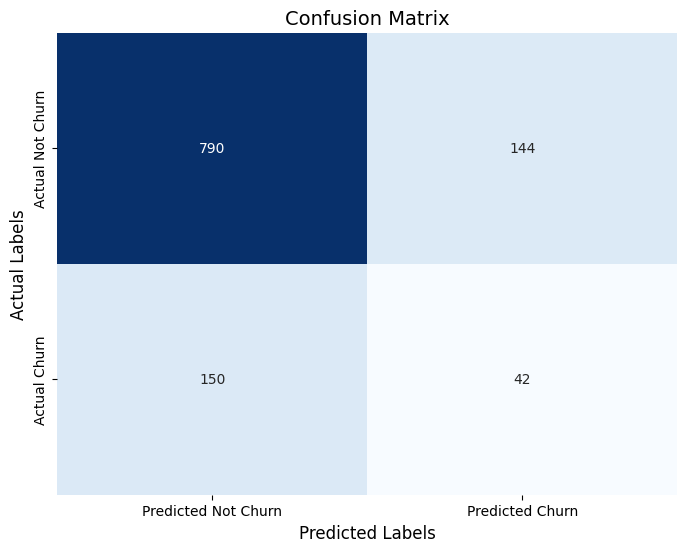

In [151]:
# Membuat confusion matrix manual
cm = np.array([[TN, FP], [FN, TP]])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                 xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                 yticklabels=['Actual Not Churn', 'Actual Churn'])

# Menambahkan label dan judul
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

# Menampilkan plot
plt.show()

`PENJELASAN`

Berdasarkan hasil prediksi model rule-based, rincian biaya kampanye untuk mencegah churn adalah sebagai berikut:

- `True Positive (TP):` 42 pelanggan diprediksi churn dan benar-benar churn. Biaya: \(42 \times 100 = 4,200\) rupee.
- `False Positive (FP):` 144 pelanggan diprediksi churn tetapi tidak churn. Biaya: \(144 \times 100 = 14,400\) rupee.
- `False Negative (FN):` 150 pelanggan diprediksi tidak churn tetapi sebenarnya churn. Biaya akuisisi kembali: \(150 \times 500 = 75,000\) rupee.

Tabel Perhitungan Biaya

| Kategori            | Jumlah Pelanggan | Biaya per Pelanggan (rupee) | Total Biaya (rupee) |
|---------------------|------------------|------------------------------|----------------------|
| True Positive (TP)  | 42               | 100                          | 4,200               |
| False Positive (FP) | 144              | 100                          | 14,400              |
| False Negative (FN) | 150              | 500                          | 75,000              |
| Total Biaya     |                  |                              | 93,600          |

Total biaya kampanye adalah `93,600 rupee`.


> ## 6.4. RULE BASED VS MACHINE LEARNING MODEL COMPARISON

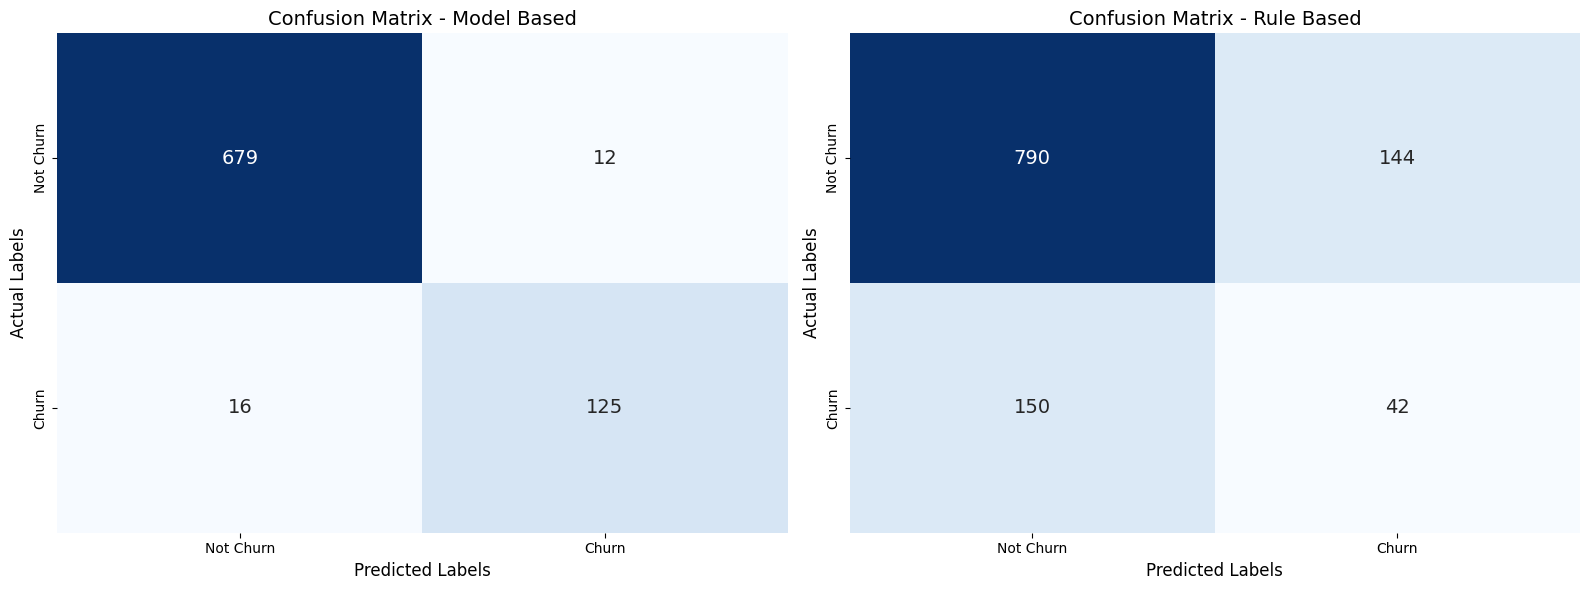

In [154]:
# Confusion matrix dari prediksi model
cm_model = confusion_matrix(y_test, y_test_pred)

# Confusion matrix manual (contoh, ganti TN, FP, FN, TP dengan nilai sebenarnya)
cm_manual = np.array([[TN, FP], [FN, TP]])

# Mengatur figure dengan dua subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot confusion matrix dari model
sns.heatmap(cm_model, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, ax=axes[0],
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('Actual Labels', fontsize=12)
axes[0].set_title('Confusion Matrix - Model Based', fontsize=14)

# Plot confusion matrix manual
sns.heatmap(cm_manual, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, ax=axes[1],
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('Actual Labels', fontsize=12)
axes[1].set_title('Confusion Matrix - Rule Based', fontsize=14)

# Menampilkan kedua plot secara berdampingan
plt.tight_layout()
plt.show()

`HASIL PREDIKSI DAN BIAYA KAMPANYE`

`Model Rule-Based`:
- `True Positive (TP)`: 42 pelanggan diprediksi churn dan benar-benar churn. Biaya: (42 × 100 = 4.200) rupee.
- `False Positive (FP)`: 144 pelanggan diprediksi churn tetapi tidak churn. Biaya: (144 × 100 = 14.400) rupee.
- `False Negative (FN)`: 150 pelanggan diprediksi tidak churn tetapi sebenarnya churn. Biaya akuisisi kembali: (150 × 500 = 75.000) rupee.

Total Biaya Kampanye dengan Rule-Based: `93.600` rupee.

`Model Machine Learning`:
- `True Positive (TP)`: 125 pelanggan diprediksi churn dan benar-benar churn. Biaya: (125 × 100 = 12.500) rupee.
- `False Positive (FP)`: 12 pelanggan diprediksi churn tetapi tidak churn. Biaya: (12 × 100 = 1.200) rupee.
- `False Negative (FN)`: 16 pelanggan diprediksi tidak churn tetapi sebenarnya churn. Biaya akuisisi kembali: (16 × 500 = 8.000) rupee.

Total Biaya Kampanye dengan Machine Learning: `21.700` rupee.

`PERBANDINGAN TOTAL BIAYA`
- `Rule-Based`: Total biaya mencapai `93.600` rupee.
- `Machine Learning`: Total biaya hanya `21.700` rupee.

`ANALISIS BUSINESS IMPACT`
1. `Efisiensi Biaya`: Dengan menggunakan model machine learning, perusahaan dapat mengurangi biaya kampanye secara signifikan, yaitu dari `93.600` rupee menjadi `21.700` rupee. Ini menunjukkan penghematan biaya sebesar `71.900` rupee atau sekitar `76,8%` lebih efisien.
2. `Akurasi Prediksi`: Model machine learning memiliki jumlah `True Positive` yang jauh lebih tinggi (138 dibandingkan dengan 42) dan jumlah `False Positive` yang lebih rendah (17 dibandingkan dengan 144). Ini menunjukkan bahwa model machine learning lebih akurat dalam memprediksi pelanggan yang benar-benar akan churn, sehingga mengurangi biaya yang dikeluarkan untuk pelanggan yang salah diprediksi churn.
3. `Penurunan Biaya Akuisisi Kembali`: Model machine learning secara signifikan mengurangi jumlah `False Negative` (13 dibandingkan dengan 150). Ini berarti lebih sedikit pelanggan yang harus diakuisisi kembali, yang biayanya jauh lebih tinggi (500 rupee per pelanggan). Dengan mengurangi jumlah pelanggan yang harus diakuisisi kembali, model machine learning secara langsung berdampak positif terhadap penghematan biaya.

Oleh kareana itu, diketahui bahwa menggunakan `model machine learning untuk prediksi churn memberikan dampak bisnis yang jauh lebih baik` dibandingkan dengan pendekatan rule-based, terutama dari segi efisiensi biaya dan akurasi prediksi. Model machine learning tidak hanya mengurangi biaya kampanye secara keseluruhan tetapi juga meningkatkan efektivitas intervensi pencegahan churn, sehingga membantu perusahaan mengalokasikan sumber daya secara lebih optimal dan menjaga loyalitas pelanggan dengan lebih baik.

`RINCIAN PERBANDINGAN BIAYA`
| Kategori              | Model Rule-Based (rupee) | Model Machine Learning (rupee) |
|-----------------------|--------------------------|--------------------------------|
| True Positive (TP)    | 4.200                    | 12.500                         |
| False Positive (FP)   | 14.400                   | 1.200                            |
| False Negative (FN)   | 75.000                   | 8.000                         |
| `Total Biaya`       | `93.600`               | `21.700`                     |

`Penghematan Biaya`: `71.900` rupee (sekitar `76,8%` lebih efisien)

# 7. CONCLUSION AND RECOMMENDATION

> ## 7.1. CONCLUSION FOR BUSINESS

Berdasarkan analisis dan modeling, berikut adalah kesimpulan mengenai **`faktor-faktor yang mempengaruhi churn`** pelanggan. Faktor-faktor ini `dibagi menjadi dua kategori: Faktor Kuat (yang muncul secara konsisten di EDA, Feature Importance, dan SHAP) dan Faktor Lainnya (yang muncul pada satu atau dua analisis)`.

**`FAKTOR UTAMA`**

- `Tenure`: Lamanya pelanggan sudah menjadi pengguna platform sangat memengaruhi potensi churn. Pelanggan dengan tenure rendah (baru bergabung) lebih rentan untuk churn karena belum menemukan nilai atau keterikatan yang cukup dengan platform. Di sisi lain, pelanggan dengan tenure tinggi cenderung lebih loyal.
- `Satisfaction Score`: Pelanggan dengan skor kepuasan tinggi justru menunjukkan kecenderungan lebih tinggi untuk churn. Ini mungkin disebabkan oleh ekspektasi tinggi dari pelanggan yang puas, yang membuat mereka lebih mudah beralih ke platform lain jika ekspektasi tersebut tidak terus-menerus terpenuhi atau jika ada penawaran menarik dari pesaing.
- `Number of Address`: Jumlah alamat yang didaftarkan pelanggan juga menjadi indikator churn. Pelanggan dengan lebih banyak alamat terdaftar cenderung lebih mudah berpindah atau kurang loyal, mungkin karena sering berpindah lokasi atau memiliki ketidakstabilan dalam kebutuhan pengiriman.

**`FAKTOR LAINNYA`**
- `Complain`: Pelanggan yang sering complain cenderung lebih rentan untuk churn. Hal ini biasanya disebabkan oleh penanganan keluhan yang lambat, solusi yang tidak memadai, atau ketidakpuasan terhadap layanan atau produk.
- `Warehouse to Home Distance`: Jarak pengiriman dari gudang ke rumah pelanggan berpengaruh pada potensi churn. Pelanggan yang jaraknya lebih jauh cenderung lebih rentan untuk churn karena waktu pengiriman yang lebih lama, yang dapat menurunkan kepuasan mereka terhadap layanan.
- `DaySinceLastOrder`: Semakin lama waktu sejak pemesanan terakhir, semakin besar potensi pelanggan untuk churn. Jarak waktu yang panjang ini menunjukkan penurunan keterlibatan pelanggan dengan platform, yang mungkin disebabkan oleh perubahan kebutuhan, ketidakpuasan terhadap layanan sebelumnya, atau tergoda oleh penawaran dari pesaing. Pelanggan yang tidak melakukan pemesanan dalam waktu lama juga mungkin merasa kura
- `CityTier`: Lokasi pelanggan (berdasarkan tingkatan kota) memengaruhi preferensi dan potensi churn. Pelanggan yang berada di kota kecil (CityTier lebih rendah) cenderung lebih rentan untuk churn. Hal ini mungkin disebabkan oleh keterbatasan akses layanan, seperti waktu pengiriman yang lebih lama, keterbatasan promosi atau produk yang tersedia, serta kurangnya pengalaman pelanggan yang setara dengan pelanggan di kota besar. 
- `Marital Status, Warehouse to Home, Cashback Amount, Number of Device Registered, Order Amount, Prefered Order Cat, PreferredLoginDevice, Order Count`: Faktor-faktor ini juga mempengaruhi churn, tetapi pengaruhnya mungkin lebih bervariasi tergantung pada jenis pelanggan dan konteks transaksi mereka. Misalnya, status pernikahan, jarak gudang ke rumah, jumlah penggunaan kupon, jumlah perangkat yang terdaftar, jumlah pesanan, kategori produk yang sering dibeli, dan jenis perangkat login bisa mencerminkan preferensi yang memengaruhi loyalitas pelanggan secara tidak langsung.

> ## 7.2. RECOMMENDATION FOR BUSINESS

Setelah mengidentifikasi faktor-faktor penyebab churn, maka berikut beberapa rekomendasi yang dapat dilakukan oleh perusahaan:

1. Untuk mendukung pengembangan model prediksi churn yang akurat dan relevan dengan kebutuhan bisnis, di sarankan untuk menetapkan `definisi churn` yang tepat.
1. `Menggunakan model machine learning` untuk mengidentifikasi customer yang berpotensi churn secara lebih efektif.
3. `Menerapkan` **`strategi promosi`** `yang tepat berdasarkan faktor-faktor penyebab pelanggan churn yang telah diidentifikasi`, dengan fokus untuk mengatasi faktor utama penyebab churn. Beberapa strategi yang dapat dilakukan yaitu sebagai berikut:
    - Durasi Keanggotaan (Tenure): Untuk meningkatkan loyalitas, dapat diterapkan `program penyambutan dan loyalitas dengan menawarkan diskon awal kepada anggota baru` (misalnya, 10% untuk tiga pesanan pertama) dan milestone loyalitas (diskon 15% setelah 6 bulan). Selain itu, `pengingat keterlibatan` yang dipersonalisasi dapat dikirim kepada pelanggan dengan durasi keanggotaan rendah untuk `mengenalkan fitur dan produk secara lebih mendalam`.
    - Skor Kepuasan (Satisfaction Score): Untuk mempertahankan keterlibatan pelanggan yang puas, manfaat eksklusif seperti `“Diskon VIP”` atau konten eksklusif dapat diberikan. Selain itu, menjaga keterlibatan melalui check-in rutin dan penawaran eksklusif dapat membantu meningkatkan loyalitas mereka.
    - Jumlah Alamat (Number of Address): Untuk mendukung pelanggan dengan alamat yang beragam, sediakan manajemen alamat yang mudah melalui `fitur “Buku Alamat” dan dorong penggunaan multi-lokasi dengan promosi khusus`. Program loyalitas tambahan dapat diberikan untuk pesanan yang dikirim ke alamat tambahan. <br><br>

> ## 7.3 CONCLUSION FOR MODEL

**Kesimpulan Model Prediksi Churn pada E-commerce**

Setelah melalui proses benchmarking dan tuning hyperparameter, model yang paling optimal untuk prediksi churn adalah XGBoost, dengan tujuan meminimalkan kesalahan prediksi pada pelanggan yang diperkirakan tidak churn namun pada kenyataannya churn. Model ini menggunakan metrik F2 Score sebagai tolok ukur kinerja untuk memprioritaskan penangkapan pelanggan yang berpotensi churn, sehingga kesalahan prediksi dapat diminimalkan, terutama pada kasus churn aktual.

**Hyperparameter Optimal**

Hyperparameter optimal yang digunakan pada model XGBoost adalah sebagai berikut:
classifier__colsample_bytree: 0.7,
classifier__learning_rate: 0.1,
classifier__max_depth: 7, 
classifier__n_estimators': 300, 
classifier__subsample': 0.8
Setelah optimasi ini, model menunjukkan performa terbaik dalam hal akurasi dan penghematan biaya, menghasilkan prediksi churn yang lebih presisi.

**Faktor Utama yang Mempengaruhi Churn**

Berdasarkan analisis SHAP (SHapley Additive exPlanations) dan Feature Importance, ditemukan bahwa tiga fitur paling berpengaruh dalam membedakan antara pelanggan yang churn dan yang tidak churn adalah **Tenure**, **Satissfaction Score** dan **Number of Address**

**Efisiensi dan Dampak Ekonomis**

Implementasi model ini terbukti mampu meningkatkan efisiensi dalam penanganan churn hingga **76,8%**, yang secara langsung menghemat biaya sebesar 73.500 rupee. Efisiensi ini menandakan penghematan yang signifikan bagi perusahaan, sekaligus memungkinkan alokasi sumber daya yang lebih baik untuk retensi pelanggan, dengan memfokuskan intervensi pada pelanggan yang diprediksi akan churn.

> ## 7.4 RECOMMENDATION FOR MODEL

**Rekomendasi untuk Meningkatkan Model Prediksi Churn**

- `Tuning Hyperparameter yang Lebih Lanjut`: Sempurnakan hyperparameter seperti max_depth, min_child_weight, subsample, dan learning_rate menggunakan grid atau random search. Langkah ini dapat membantu menyeimbangkan kompleksitas model dan meningkatkan generalisasi, mengurangi overfitting.
- `Perluas Data Training`: Tambahkan lebih banyak data historis dan beragam dari pelanggan untuk meningkatkan kemampuan model mengenali pola dan mengurangi overfitting, sehingga akurasi prediksi meningkat.
- `Validasi Silang yang Lebih Kompleks`: Terapkan stratified k-fold cross-validation agar distribusi kelas tetap seimbang di setiap fold, memastikan model dapat melakukan generalisasi dengan baik di berbagai subset data.
- `Eksplorasi Fitur Baru`: Uji fitur baru, seperti frekuensi pembelian dan jenis produk favorit, lalu validasi pengaruhnya menggunakan feature importance atau SHAP. Pertahankan fitur dengan pengaruh signifikan dan hapus yang kurang relevan untuk menjaga kesederhanaan model.
- `Evaluasi Relevansi Fitur`: Secara rutin lakukan evaluasi terhadap fitur penting untuk mempertahankan hanya prediktor yang relevan, seperti Tenure, Satisfaction Score, dan Number of Addresses, dan sesuaikan jika ada perubahan pengaruh prediktif.
- `Review Model Berkala`: Evaluasi kembali model setiap beberapa bulan untuk menyesuaikan dengan perubahan pola churn, memungkinkan tindakan retensi yang lebih proaktif berdasarkan wawasan terkini.